# Import Packages

In [1]:
import os
import sys
import pandas as pd

from IPython.display import display

project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

from data.data_preprocessing import map_and_convert_categories
from utils.plotting import DataVisualiser
from utils.helpers import load_data, check_and_print_missing_value_counts

# Load data

In [2]:
data = load_data("train.csv")

# Initial Exploration
## Shape and Structure

In [3]:
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Dropping Unwanted Features
- id: This is just a unique identifier for each property in the dataset, which does not contribute to predicting sale price

In [4]:
data.drop(columns=['Id'], inplace=True)

## Data Types

In [5]:
pd.options.display.max_rows = None
display(data.dtypes.to_frame(name='DataType'))

,DataType
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object


## Data Type Conversion
The following features will be converted to categorical types for improved interpretability and accurate analysis:
1. **MSSubClass:** Represents the building type, with each value corresponding to a specific category (e.g., 20 = 1-Story 1946 & newer, 30 = 1-Story 1945 & older). These numeric codes are inherently categorical and do not have any quantitative relationship
2. **OverallQual:** Rates the overall material and finish quality of the house on a scale from 1 (Very Poor) to 10 (Excellent). These values are categorical codes representing quality levels rather than numerical values with a mathematical relationship
3. **OverallCond:** Rates the overall condition of the house on a scale from 1 (Very Poor) to 10 (Excellent). Similar to OverallQual, these values are categorical codes indicating condition levels, not ordinal or quantitative data
4. **Other Categorical Columns:** Columns with abbreviations will be mapped to their corresponding full names (e.g., Ex to "Excellent", Gd to "Good") to improve clarity and interpretability in both analysis and visualizations

In [6]:
data = map_and_convert_categories(data)

# Univariate Analysis

In [7]:
visualizer = DataVisualiser(data)

## MSSubClass
### Checking for missing values

In [8]:
check_and_print_missing_value_counts(data, 'MSSubClass')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [9]:
data['MSSubClass'].describe()

count                                1460
unique                                 15
top       1-STORY 1946 & NEWER ALL STYLES
freq                                  536
Name: MSSubClass, dtype: object

### Visualization

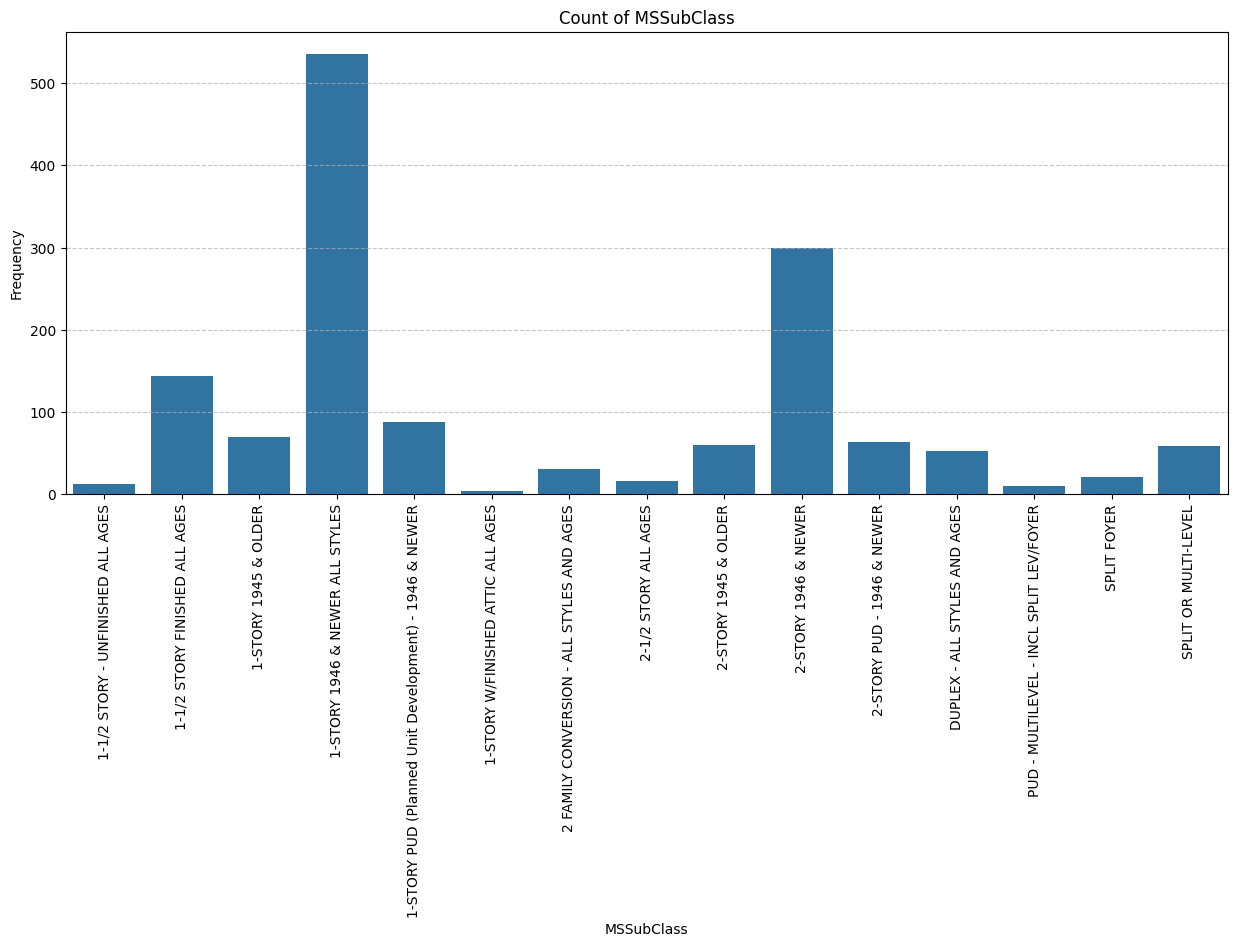

In [10]:
visualizer.plot('MSSubClass')

#### Insights:
- No Missing Values hence no need for imputation or handling nulls
- 15 unique housing types are represented
- 1-STORY 1946 & NEWER ALL STYLES dominates the dataset, with over 500 occurrences
- The second most frequent category is 2-STORY 1946 & NEWER, followed by others like 1-1/2 STORY FINISHED ALL AGES
- Less frequent categories include PUD (Planned Unit Development) MULTILEVEL
- This indicates that the dataset is skewed towards more modern housing styles (post-1946), especially one-story homes

## MSZoning
### Checking for missing values

In [11]:
check_and_print_missing_value_counts(data, 'MSZoning')

Missing values count: 10
Missing values percentage: 0.68%


### Descriptive statistics

In [12]:
data['MSZoning'].describe()

count                        1450
unique                          4
top       Residential Low Density
freq                         1151
Name: MSZoning, dtype: object

### Visualization

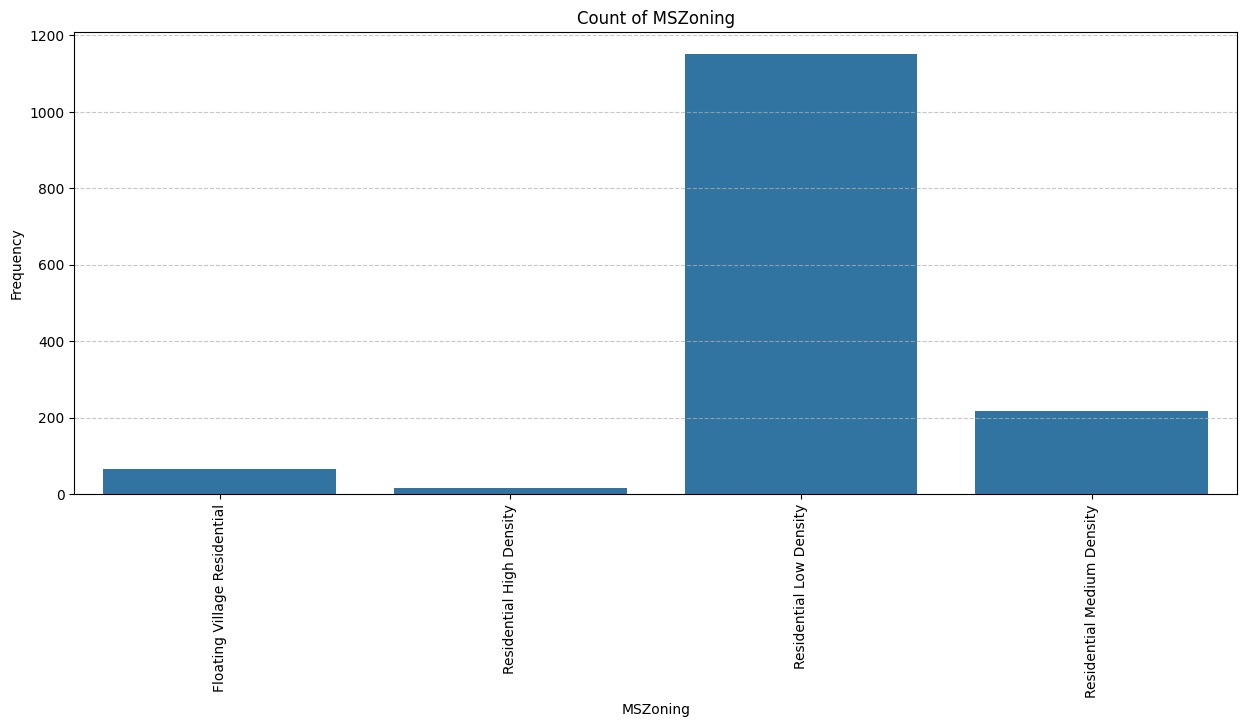

In [13]:
visualizer.plot('MSZoning')

#### Insights:
- A small portion of this column is missing (i.e 10 values)
- The dataset contains 4 unique zoning categories, showing a relatively simple distribution of zoning types
- The most frequent zoning classification is Residential Low Density (RL), with over 1150 occurrences. This suggests a strong representation of low-density residential properties in the dataset
- Residential Medium Density (RM) appears as the second most frequent category, followed by smaller counts of Floating Village Residential (FV) and Residential High Density (RH)
- The Floating Village Residential and Residential High Density zones represent niche segments in this dataset

## LotFrontage
### Checking for missing values

In [14]:
check_and_print_missing_value_counts(data, 'LotFrontage')

Missing values count: 259
Missing values percentage: 17.74%


### Descriptive statistics

In [15]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

### Visualization

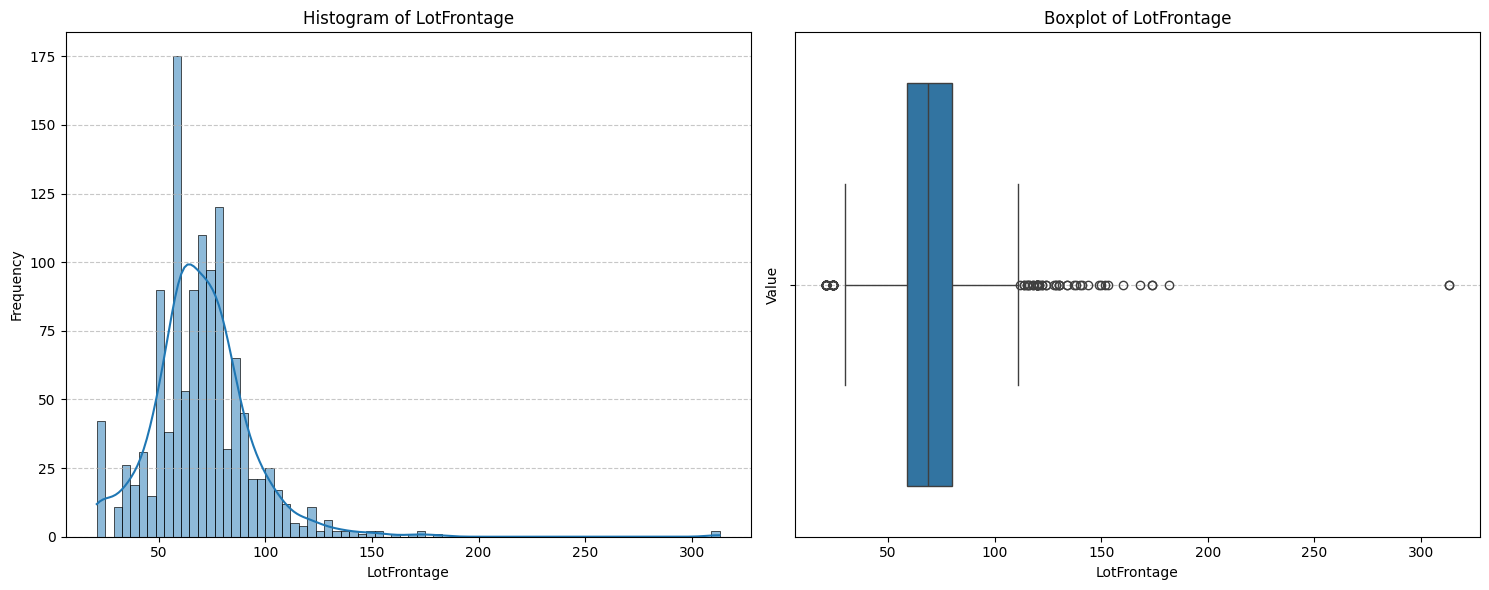

In [16]:
visualizer.plot('LotFrontage')

## Insights:
- 259 missing values (17.74%): A significant proportion of values are missing and will need to be addressed through imputation or other strategies.
- **Summary Statistics:**
    - Mean: ~70 feet, indicating the average property frontage.
    - Median (50%): 69 feet, close to the mean, indicating a somewhat symmetric distribution.
    - Minimum: 21 feet, likely smaller properties or corner lots.
    - Maximum: 313 feet, an outlier suggesting unusually large properties or plots.
    - 25th Percentile (Q1): 59 feet and 75th Percentile (Q3): 80 feet, indicating most properties fall between these ranges.
    - Standard Deviation: 24.28 feet, suggesting a moderate spread of values around the mean.
- **Histogram:** The distribution is right-skewed, with most properties having frontage in the range of 50–100 feet.
A long tail extends towards higher values, suggesting the presence of outliers.
- **Boxplot:** Highlights a significant number of outliers on the lower and higher end (values below ~25 feet and values exceeding ~120 feet)

## LotArea	
### Checking for missing values

In [17]:
check_and_print_missing_value_counts(data, 'LotArea')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [18]:
data['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

### Visualization

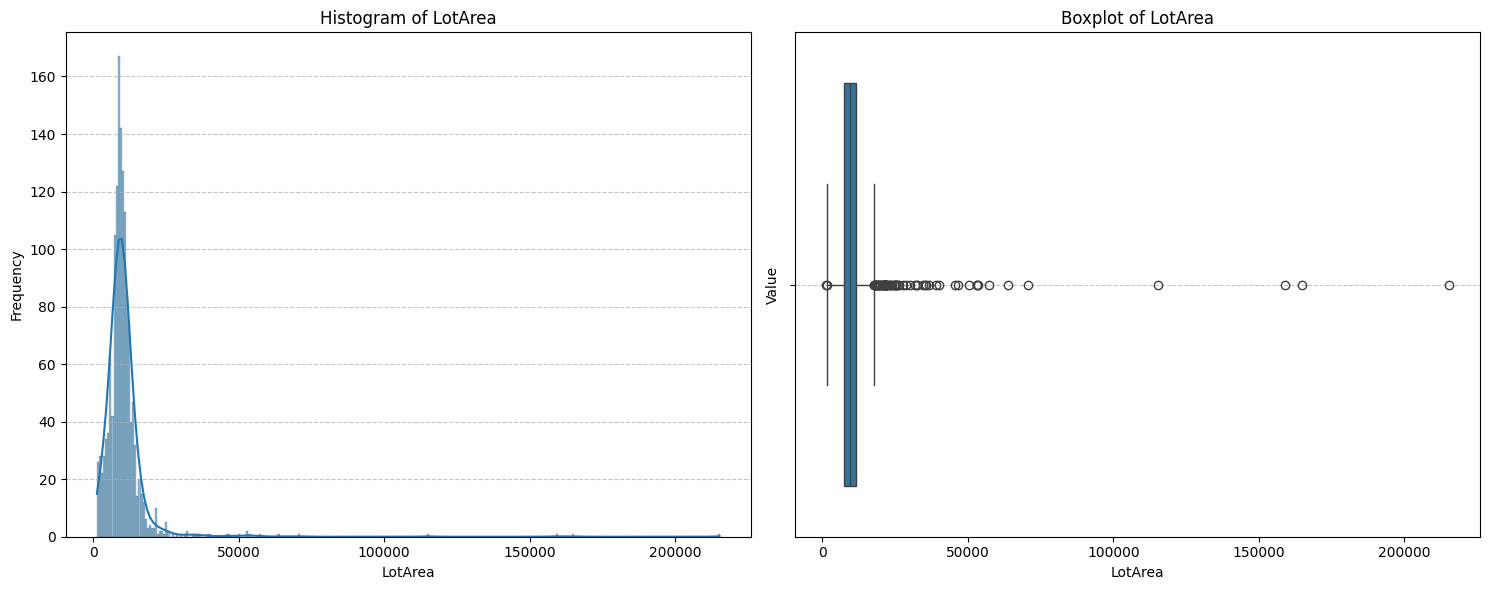

In [19]:
visualizer.plot('LotArea')

#### Insights:
-  No missing values, so no imputation is necessary.
- **Summary Statistics:**
    - Mean: ~10,512 square feet, indicating the average lot size.
    - Median (50%): ~9,478 square feet, slightly lower than the mean, suggesting a slight right skew.
    - Minimum: 1,300 square feet, representing small plots.
    - Maximum: 215,245 square feet, representing a massive property likely to be an outlier.
    - 25th Percentile (Q1): 7,553 square feet and 75th Percentile (Q3): 11,601 square feet, showing that the middle 50% of properties range from small to moderately large lots.
    - Standard Deviation: ~9,981 square feet, indicating significant variation in lot sizes.
- **Histogram:**
    - The distribution is highly right-skewed, with most properties concentrated below ~20,000 square feet.
    - A few extremely large properties (above ~30,000 square feet) contribute to the skew.
- **Boxplot:** Highlights the presence of many outliers, especially above ~30,000 square feet. These extreme values likely represent unique or unusual properties

## Street	
### Checking for missing values

In [20]:
check_and_print_missing_value_counts(data, 'Street')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [21]:
data['Street'].describe()

count      1460
unique        2
top       Paved
freq       1454
Name: Street, dtype: object

### Visualization

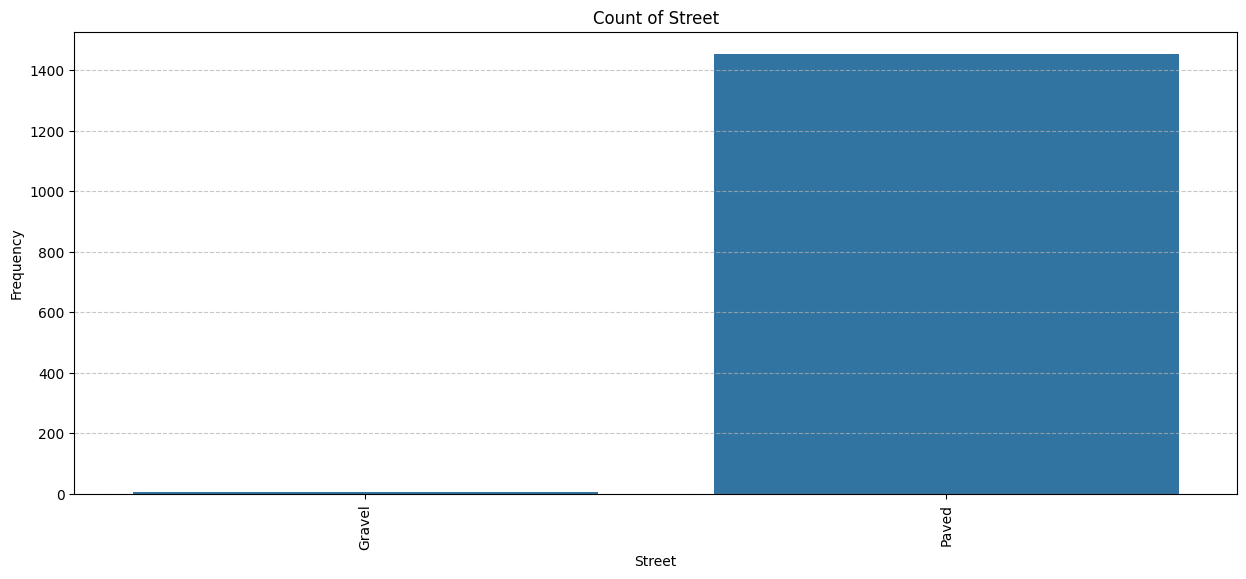

In [22]:
visualizer.plot('Street')

#### Insights:
- The dataset is complete for this variable.
- 1,454 properties (~ 99.6%) have paved road access and only 6 properties (~ 0.4%) have gravel road access.
- The dominant category is Paved, indicating that almost all properties are accessible via paved roads.
- **Count Plot:**
    - The visualization confirms the overwhelming dominance of Paved roads in the dataset.
    - The Gravel category represents a very small fraction, appearing as a negligible bar in the plot.

## Alley
### Checking for missing values

In [23]:
check_and_print_missing_value_counts(data, 'Alley')

Missing values count: 1369
Missing values percentage: 93.77%


### Descriptive Statistics

In [24]:
data['Alley'].describe()

count         91
unique         2
top       Gravel
freq          50
Name: Alley, dtype: object

### Visualization

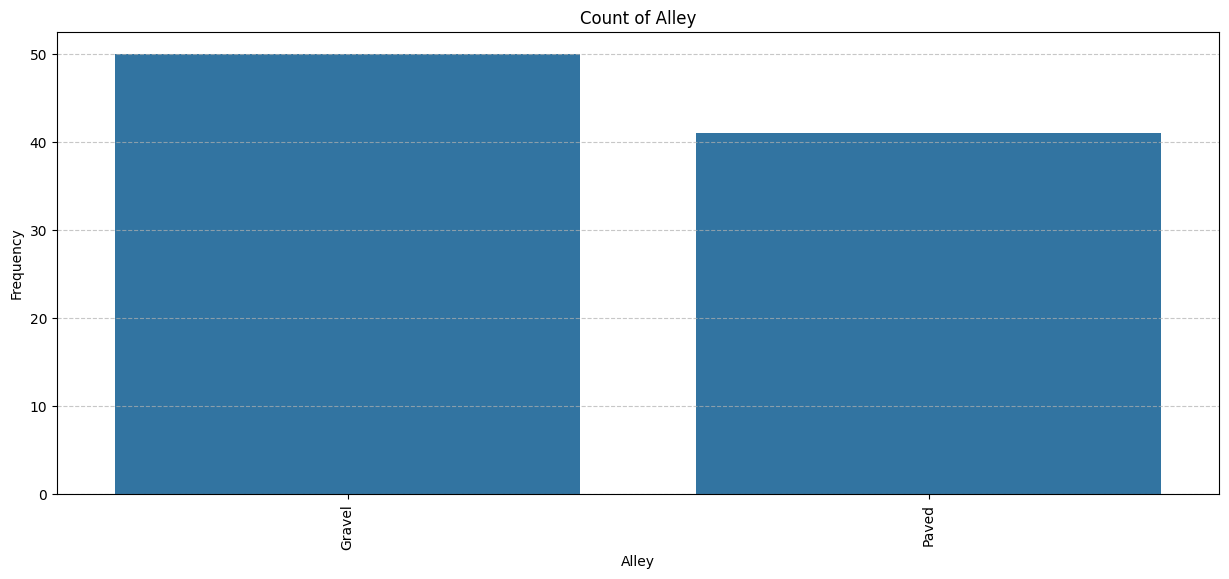

In [25]:
visualizer.plot('Alley')

#### Insights:
- 1369 missing values (93.77%): A vast majority of the properties do not have alley access, as indicated by missing values
- Missing values in this context likely represent the absence of an alley and may not need traditional imputation but rather treated as a separate category, e.g., "No Alley"
- Gravel: 50 occurrences, making it the most common type of alley access among the properties with alleys
- Paved: 41 occurrences, representing the minority among the properties with alleys
- Only two types of alley surfaces are explicitly listed: Gravel and Paved
- **Count Plot:** The plot shows that Gravel alleys are slightly more frequent than Paved alleys, but both categories are vastly underrepresented due to the dominance of missing values

## LotShape
### Checking for missing values

In [26]:
check_and_print_missing_value_counts(data, 'LotShape')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [27]:
data['LotShape'].describe()

count        1460
unique          4
top       Regular
freq          925
Name: LotShape, dtype: object

### Visualization

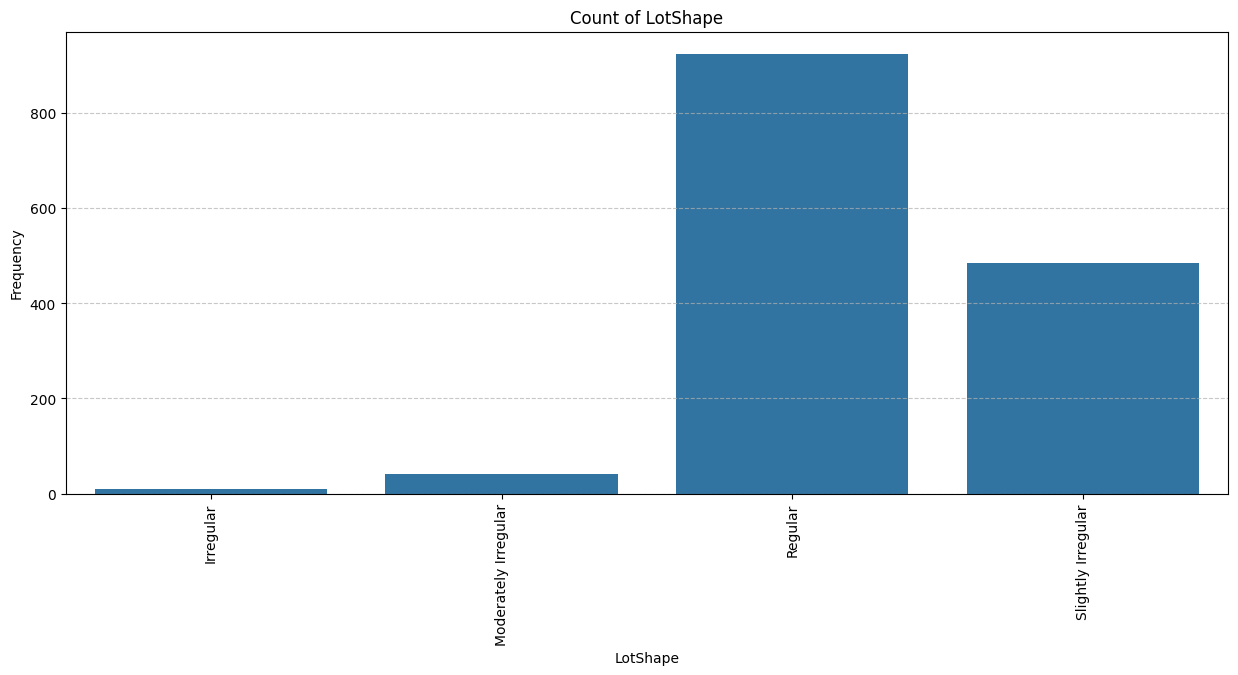

In [28]:
visualizer.plot('LotShape')

#### Insights:
-  No missing values, so the column is complete and ready for analysis.
-  The most common lot shape, with 925 properties (~63.4%), indicating that most properties have standard regular shapes.
-  Slightly Irregular: The second most common, with a significant proportion of properties (~30.5%).
-  Moderately Irregular: Rare, with only a small fraction of properties (~4.5%).
-  Irregular: Least common, accounting for less than 2% of the dataset.
- **Count Plot:**
    - The plot highlights the dominance of Regular lot shapes, followed by a notable number of Slightly Irregular shapes
    - Moderately Irregular and Irregular lot shapes are uncommon, appearing as much smaller bars

## LandContour
### Checking for missing values

In [29]:
check_and_print_missing_value_counts(data, 'LandContour')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [30]:
data['LandContour'].describe()

count                1460
unique                  4
top       Near Flat/Level
freq                 1311
Name: LandContour, dtype: object

### Visualization

visualizer.plot('LandContour')

#### Insights:
-  The column is complete and ready for analysis.
-  **Distribution:**
    -  Near Flat/Level (Lvl): The most common contour, with 1,311 properties (~89.8%), indicating that the vast majority of properties are on flat or nearly flat land.
    -  Banked (Bnk): 63 properties (~4.3%), referring to lots with a significant rise from street grade.
    -  Depression (Low): 36 properties (~2.5%), representing low areas or depressions.
    -  Hillside (HLS): 50 properties (~3.4%), referring to properties with significant side-to-side slopes.
- **Count Plot:**
    - The plot shows a clear dominance of Near Flat/Level properties, with the other categories being significantly underrepresented.
    - Banked, Depression, and Hillside contours collectively account for just over 10% of the dataset.

## Utilities
### Checking for missing values

In [31]:
check_and_print_missing_value_counts(data, 'Utilities')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [32]:
data['Utilities'].describe()

count                     1460
unique                       2
top       All Public Utilities
freq                      1459
Name: Utilities, dtype: object

### Visualization

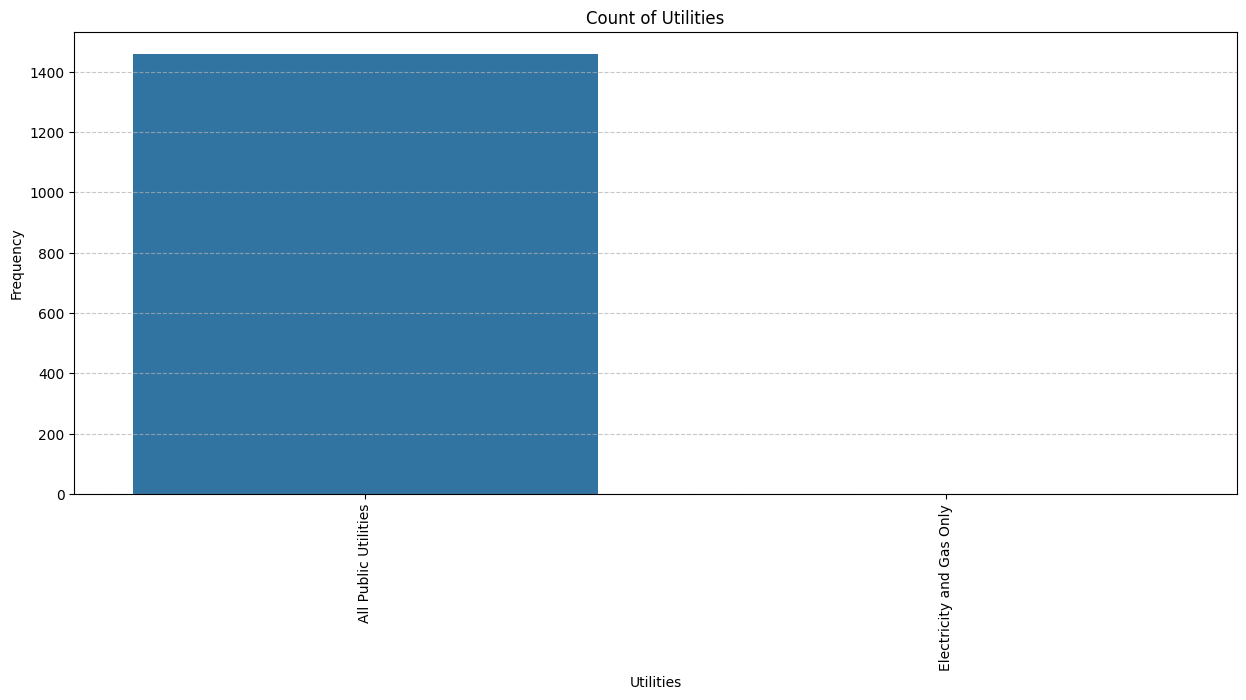

In [33]:
visualizer.plot('Utilities')

#### Insights:
- The column is complete, requiring no additional handling for missing data.
- **Distribution:**
    - All Public Utilities: Dominates the dataset, with 1,459 properties (~99.93%).
    - Electricity and Gas Only: Appears in only 1 property (~0.07%).
- **Count Plot:** The visualization clearly shows the overwhelming majority of properties have All Public Utilities, with Electricity and Gas Only being negligible

## LotConfig
### Checking for missing values

In [34]:
check_and_print_missing_value_counts(data, 'LotConfig')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive statistics

In [35]:
data['LotConfig'].describe()

count           1460
unique             5
top       Inside Lot
freq            1052
Name: LotConfig, dtype: object

### Visualization

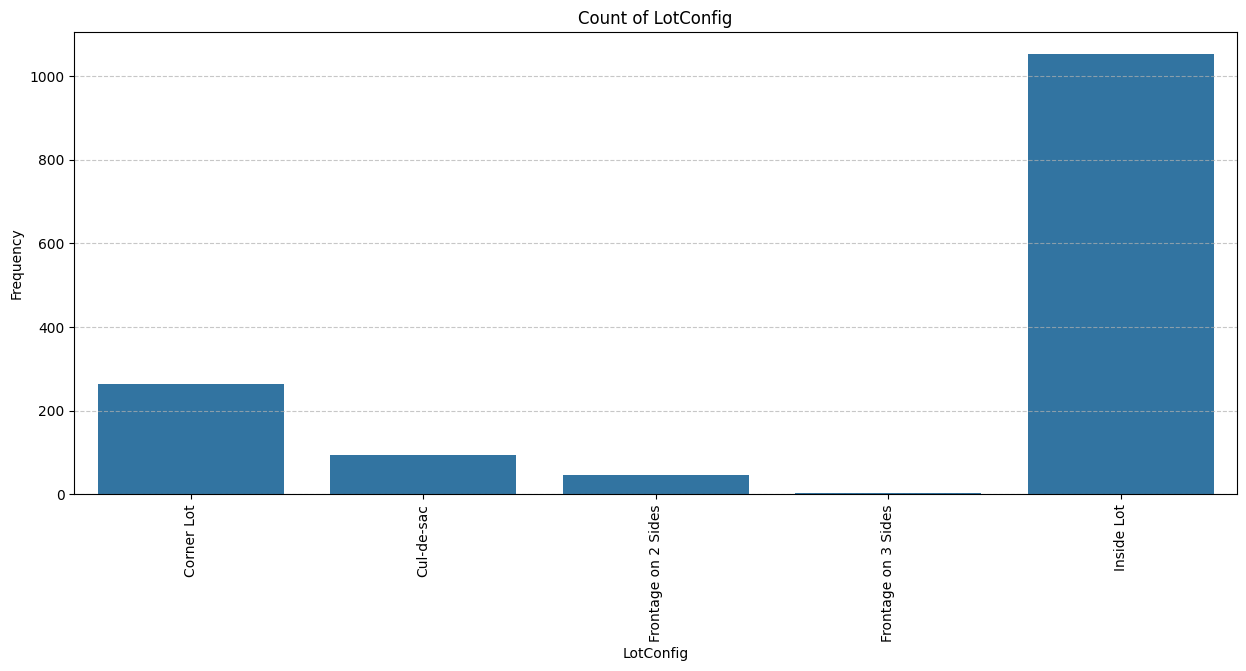

In [36]:
visualizer.plot('LotConfig')

#### Insights:
- The column is complete, requiring no missing value imputation.
- **Distribution:**
    - Inside Lot: The most common configuration, with 1,052 properties (~72.1%). These are standard interior lots.
    - Corner Lot: 263 properties (~18.0%), representing lots on the corner of two intersecting streets.
    - Cul-de-sac: 94 properties (~6.4%), located at the closed end of a street.
    - Frontage on 2 Sides: 41 properties (~2.8%).
    - Frontage on 3 Sides: Rare, with only 10 properties (~0.7%).
- **Count Plot:**
    - The dominance of Inside Lot is evident, followed by Corner Lot, with the remaining configurations having significantly smaller frequencies.
    - Frontage on 3 Sides is the least common configuration.

## LandSlope
### Checking for missing values

In [37]:
check_and_print_missing_value_counts(data, 'LandSlope')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [38]:
data['LandSlope'].describe()

count             1460
unique               3
top       Gentle Slope
freq              1382
Name: LandSlope, dtype: object

### Visualization

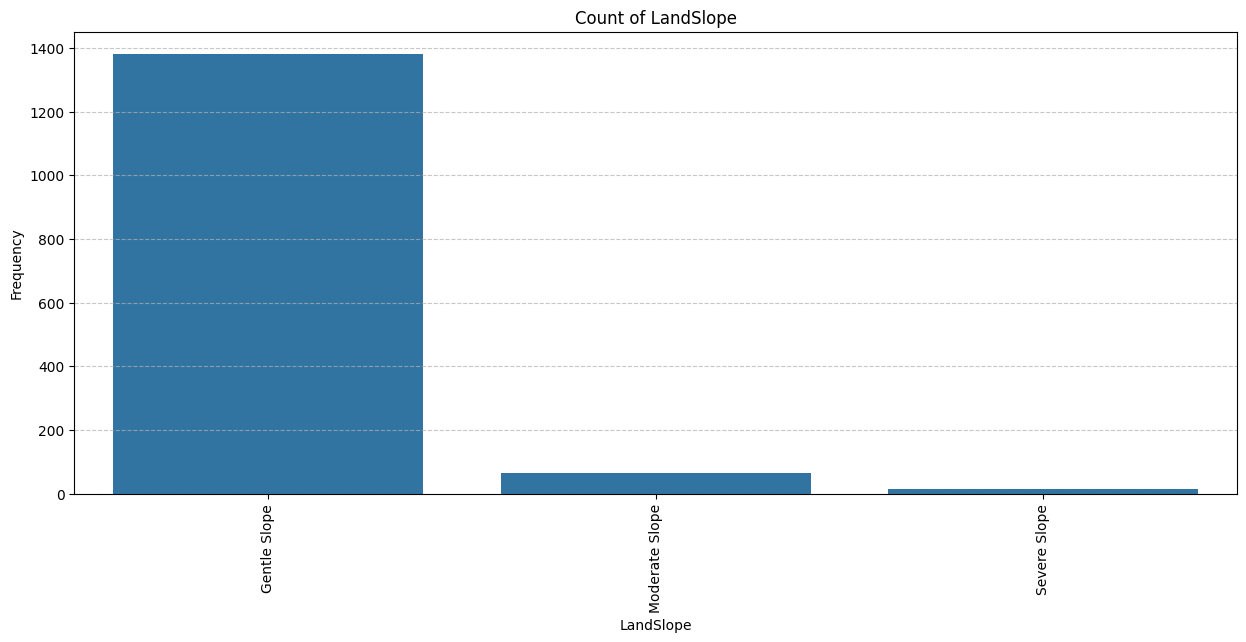

In [39]:
visualizer.plot('LandSlope')

#### Insights:
- The column is complete, requiring no missing value imputation.
- **Distribution:**
    - Gentle Slope: The overwhelming majority of properties (1,382 or ~94.7%) have a gentle slope.
    - Moderate Slope: 65 properties (~4.5%) have a moderate slope.
    - Severe Slope: 13 properties (~0.9%) have a severe slope, making it a rare category.
- Count Plot: The plot confirms the dominance of Gentle Slope, with Moderate Slope and Severe Slope being much less frequent.

## Neighborhood
### Checking for missing values

In [40]:
check_and_print_missing_value_counts(data, 'Neighborhood')

Missing values count: 225
Missing values percentage: 15.41%


### Descriptive Statistics

In [41]:
data['Neighborhood'].describe()

count              1235
unique               24
top       College Creek
freq                150
Name: Neighborhood, dtype: object

### Visualization

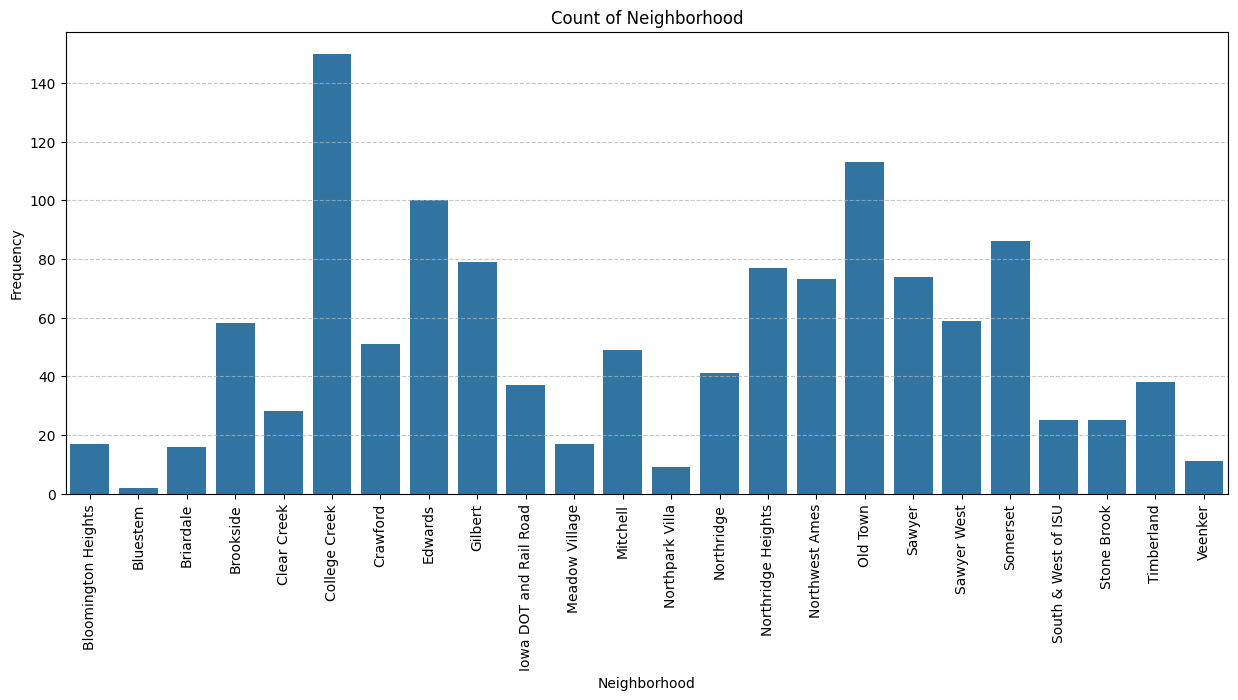

In [42]:
visualizer.plot('Neighborhood')

#### Insights:
- 225 missing values (15.41%): This is a significant proportion and should be handled carefully
- **Distribution:**
    - The most frequent neighborhood is College Creek, with 150 properties (~12.1% of non-missing entries).
    - Other frequently represented neighborhoods include Edwards, Old Town, and Gilbert.
    - Some neighborhoods, such as Bluestem, Bloomington Heights, and Veenker, have minimal representation, with less than 20 occurrences each.
- **Count Plot:** The distribution is uneven, with a few neighborhoods like College Creek dominating, while others have very few occurrences.

## Condition1
### Checking for missing values

In [43]:
check_and_print_missing_value_counts(data, 'Condition1')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [44]:
data['Condition1'].describe()

count       1460
unique         9
top       Normal
freq        1260
Name: Condition1, dtype: object

### Visualization

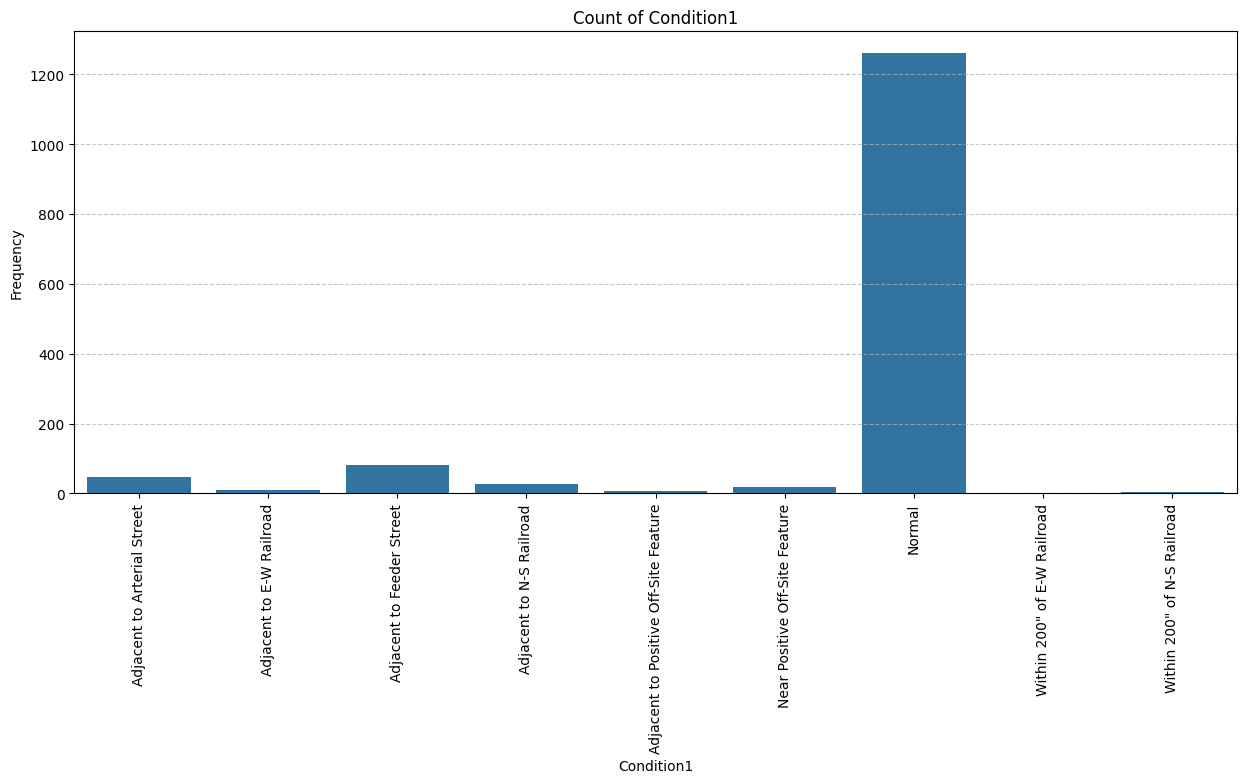

In [45]:
visualizer.plot('Condition1')

#### Insights:
- The column is complete, requiring no missing value handling.
- **Distribution:**
    - Normal: The most frequent category, with 1,260 properties (~86.3%), indicating that most properties are not adjacent to any notable conditions.
    - Other categories, such as Adjacent to Feeder Street, Adjacent to Arterial Street, and Near Positive Off-Site Feature, each represent a small fraction of the dataset.
    - Categories like Within 200' of Railroad or Adjacent to Railroad are extremely rare.
- **Count Plot:** The dominance of the Normal category is clearly visible, with all other categories having minimal representation.

## Condition2
### Checking for missing values

In [46]:
check_and_print_missing_value_counts(data, 'Condition2')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [47]:
data['Condition2'].describe()

count       1460
unique         8
top       Normal
freq        1445
Name: Condition2, dtype: object

### Visualization

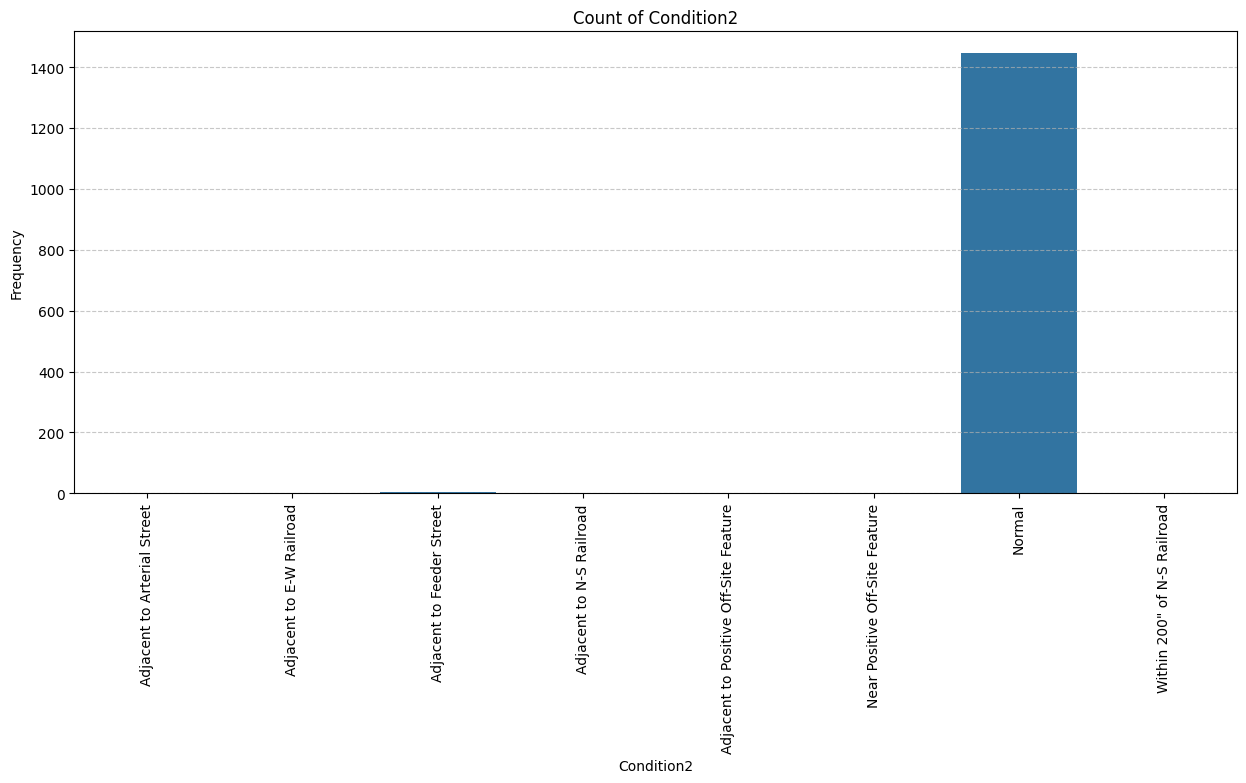

In [48]:
visualizer.plot('Condition2')

#### Insights:
- The column is complete and requires no missing value handling.
- **Distribution:**
    - Normal: The vast majority of properties (1,445 or ~98.4%) fall under the Normal category, indicating no additional notable conditions.
    - The remaining categories, such as Adjacent to Feeder Street, Adjacent to Arterial Street, and Adjacent to Railroad, each represent fewer than 1% of the properties.
    - Some categories, such as Near Positive Off-Site Feature or Adjacent to Positive Off-Site Feature, are extremely rare.
- **Count Plot:** The distribution is dominated by the Normal category, with all other conditions being negligible in comparison.

## BldgType
### Checking for missing values

In [49]:
check_and_print_missing_value_counts(data, 'BldgType')

Missing values count: 126
Missing values percentage: 8.63%


### Descriptive Statistics

In [50]:
data['BldgType'].describe()

count                       1334
unique                         2
top       Single-Family Detached
freq                        1220
Name: BldgType, dtype: object

### Visualization

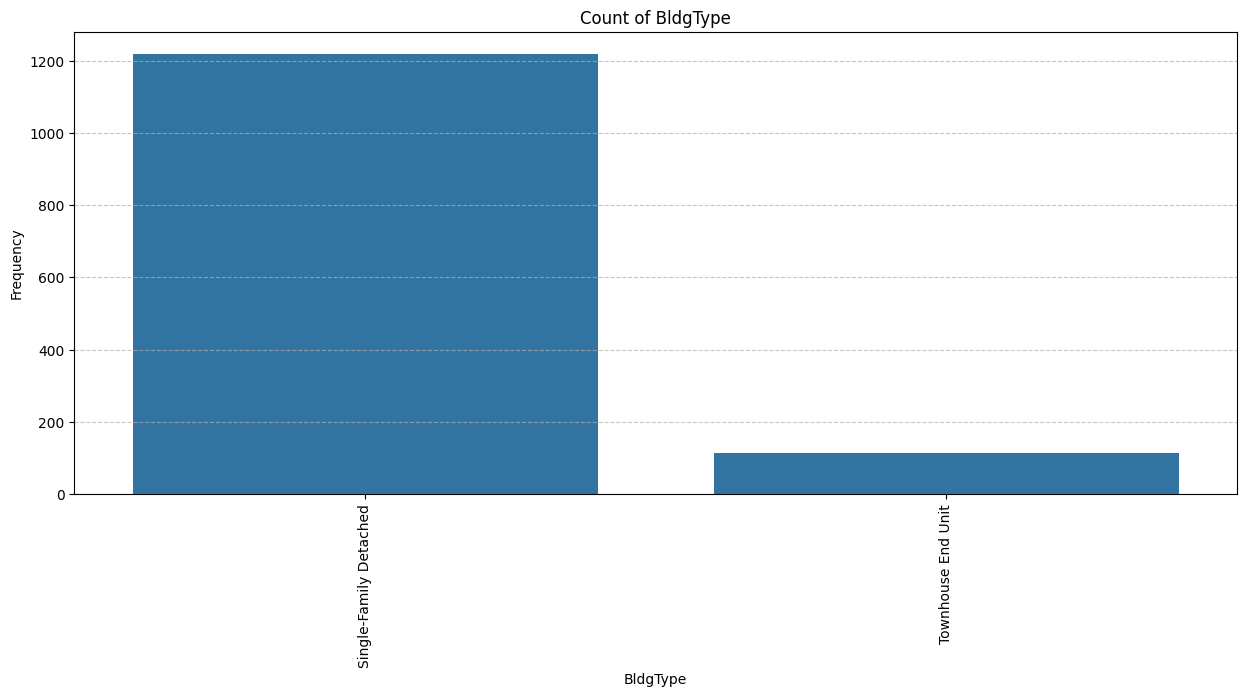

In [51]:
visualizer.plot('BldgType')

#### Insights:
- 126 missing values (8.63%): A moderate proportion of values are missing and should be addressed through imputation or other methods.
- **Distribution:**
    - Single-Family Detached: The vast majority, with 1,220 properties (~91.4% of non-missing values), indicating a dominant focus on single-family homes in the dataset.
    - Townhouse End Unit: A minority, with 114 properties (~8.6% of non-missing values), representing a smaller portion of the market.
- **Count Plot:** The Single-Family Detached category overwhelmingly dominates the dataset, with Townhouse End Unit representing a much smaller share.

## HouseStyle
### Checking for missing values

In [52]:
check_and_print_missing_value_counts(data, 'HouseStyle')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [53]:
data['HouseStyle'].describe()

count          1460
unique            8
top       One Story
freq            726
Name: HouseStyle, dtype: object

### Visualization

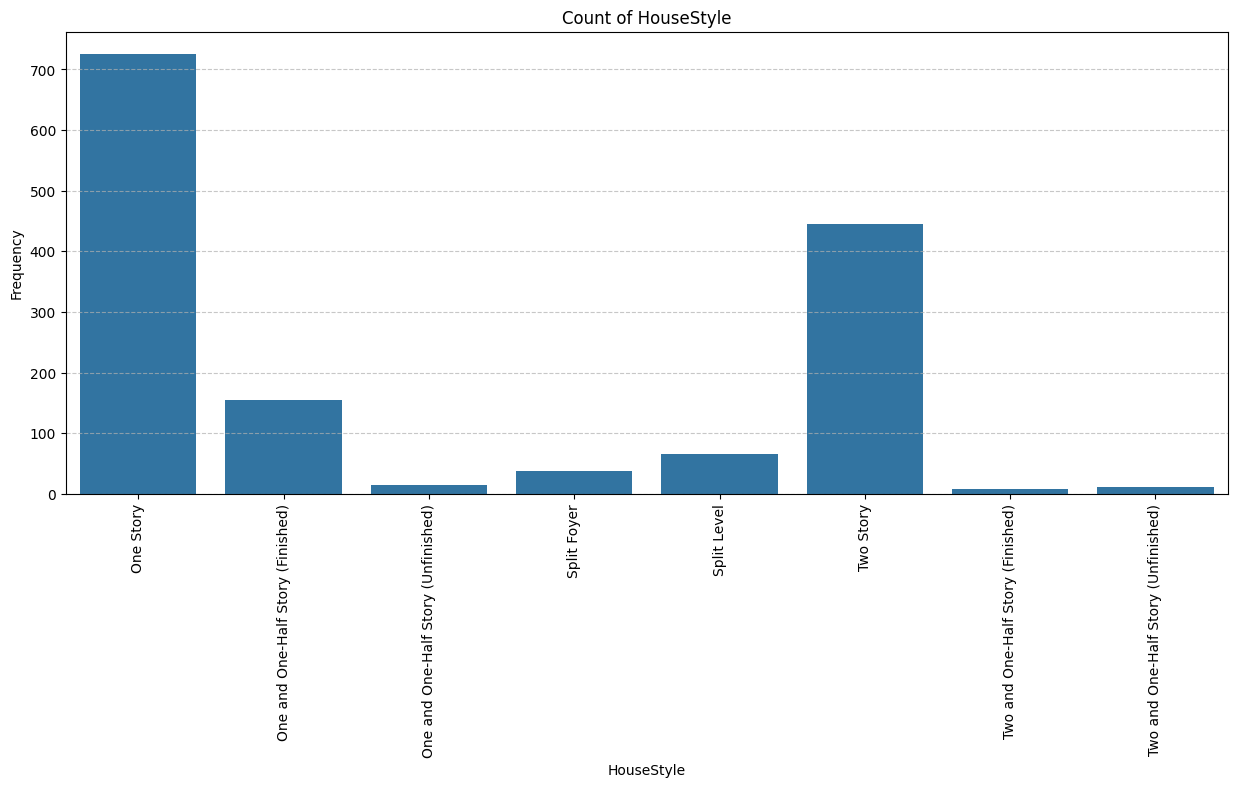

In [54]:
visualizer.plot('HouseStyle')

#### Insights:
- The column is complete, so no imputation is required.
- **Distribution:**
    - One Story: The most common house style, with 726 properties (~49.7%), making it the dominant category.
    - Two Story: The second most common, with 445 properties (~30.5%).
    - Other styles like One and One-Half Story (Finished) and Split Level represent smaller portions of the dataset.
    - Rare styles include Two and One-Half Story (Finished/Unfinished) and Split Foyer, each accounting for a negligible share of the dataset.
- **Count Plot:** The plot highlights the dominance of One Story and Two Story houses, while other styles are significantly less represented.

## OverallQual
### Checking for missing values

In [55]:
check_and_print_missing_value_counts(data, 'OverallQual')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statitsics

In [56]:
data['OverallQual'].describe()

count        1460
unique         10
top       Average
freq          397
Name: OverallQual, dtype: object

### Visualization

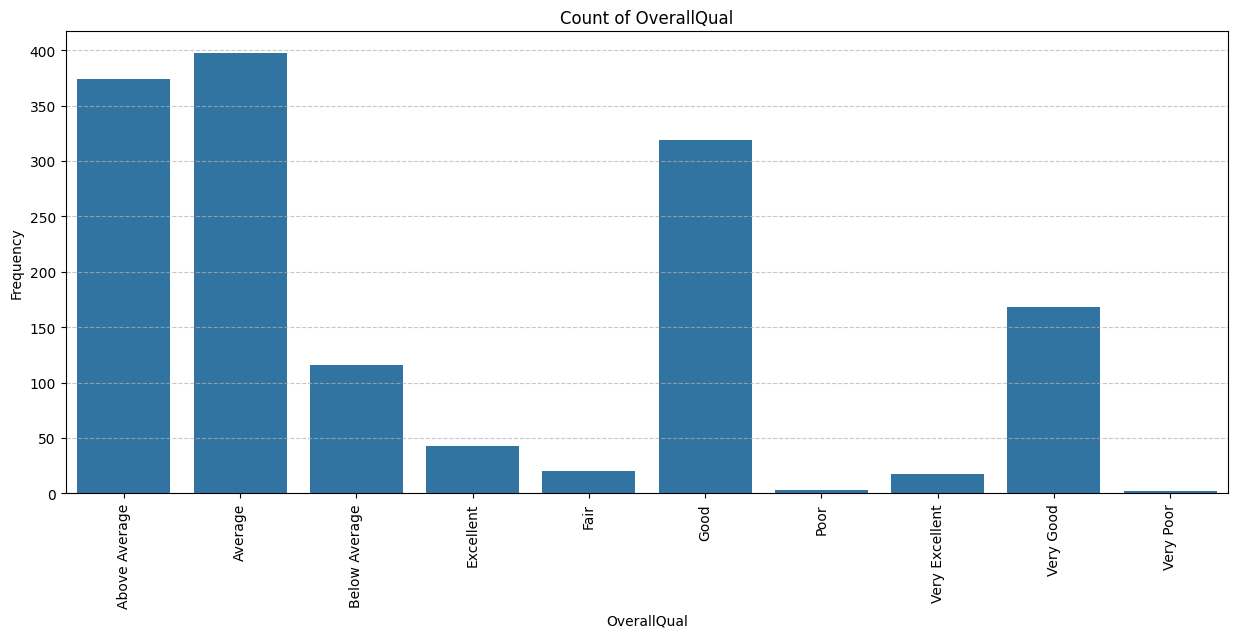

In [57]:
visualizer.plot('OverallQual')

#### insights:
- The column is complete, requiring no handling for missing values.
- **Distribution:**
    - The most frequent rating is Average (5), with 397 properties (~27.2% of the dataset).
    - Above Average (6) and Good (7) also have high frequencies, representing a substantial portion of the dataset.
    - High-quality ratings like Very Excellent (10) and low-quality ratings like Very Poor (1) are rare, each representing less than 1% of the dataset.
- **Count Plot:**
    - The distribution is centered around the middle ratings (5 to 7), indicating most properties have average to slightly above-average quality.
    - Very high (9–10) and very low (1–2) ratings are underrepresented.

## OverallCond
### Checking for missing values

In [58]:
check_and_print_missing_value_counts(data, 'OverallCond')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [59]:
data['OverallCond'].describe()

count        1460
unique          9
top       Average
freq          821
Name: OverallCond, dtype: object

### Visualization

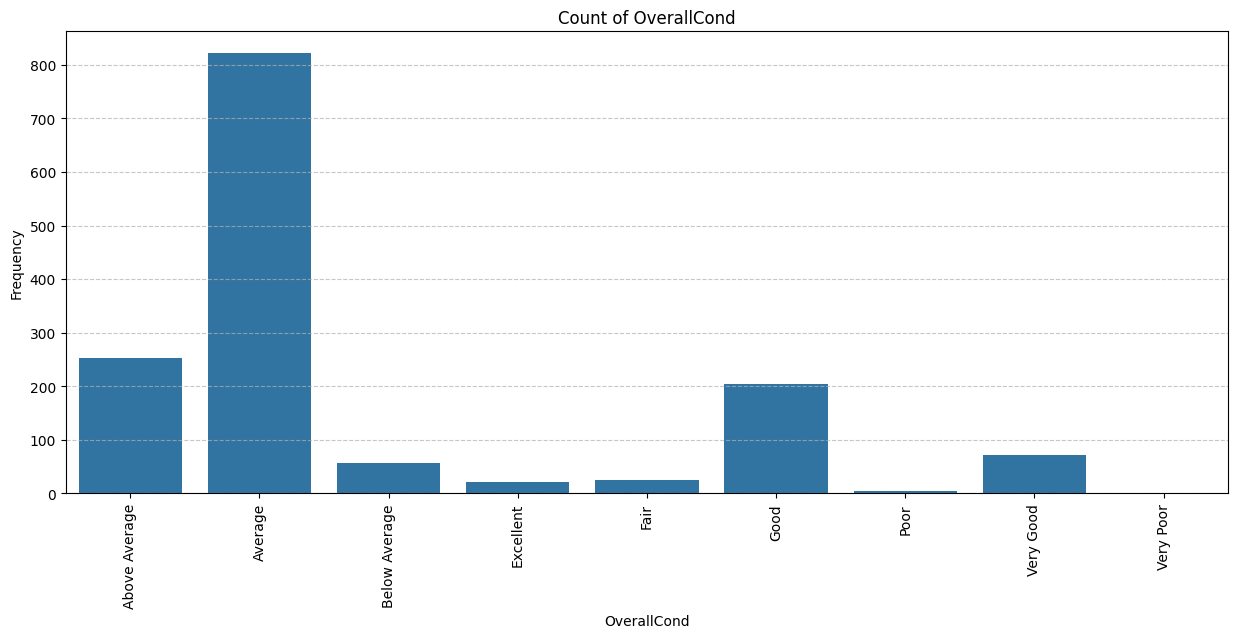

In [60]:
visualizer.plot('OverallCond')

#### Insights:
- The column is complete and requires no handling for missing values.
- **Distribution:**
    - The majority of properties have an Average (5) condition, with 821 properties (~56.2% of the dataset).
    - Good (6) and Above Average (7) conditions are also present in moderate proportions.
    - Extreme conditions, such as Very Poor (1), Poor (2), and Excellent (9), are rare and represent less than 1% of the dataset.
- **Count Plot:** The plot highlights the overwhelming dominance of Average (5) ratings, with the distribution tapering off significantly at both ends.

## YearBuilt
### Checking for missing values

In [61]:
check_and_print_missing_value_counts(data, 'YearBuilt')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [62]:
data['YearBuilt'].describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

### Visualization

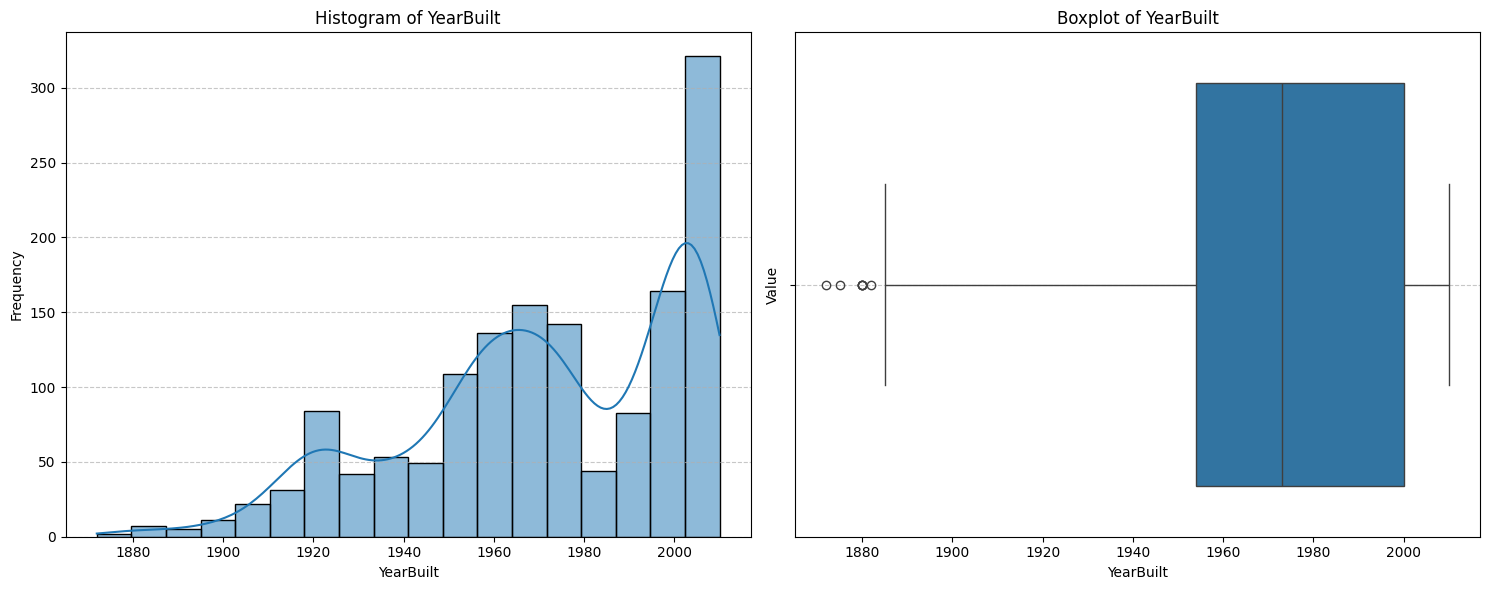

In [63]:
visualizer.plot('YearBuilt')

#### Insights:
- The column is complete and requires no missing value handling.
- **Distribution:**
    - Mean Year Built: 1971, indicating that the average property in the dataset was constructed in the early 1970s.
    - Median Year Built: 1973, slightly newer than the mean, suggesting a small right skew.
    - Range:
        - Oldest Property: Built in 1872.
        - Newest Property: Built in 2010.
    - Interquartile Range (IQR): 1954 to 2000, meaning most properties were constructed within this time frame.
    - Standard Deviation: ~30 years, reflecting substantial variation in construction dates
- **Histogram:**
    - The distribution shows clear peaks corresponding to construction booms:
    - A gradual increase starting in the early 20th century.
    - A significant rise post-1950, with a peak around 2000.
    - There are relatively few properties built before 1900, making these outliers.
- **Boxplot:**
    - Highlights the presence of a few very old properties (outliers below 1900).
    - The majority of properties fall within the IQR (1954–2000).

## YearRemodAdd
### Checking for missing values

In [64]:
check_and_print_missing_value_counts(data, 'YearRemodAdd')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [65]:
data['YearRemodAdd'].describe()

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

### Visualization

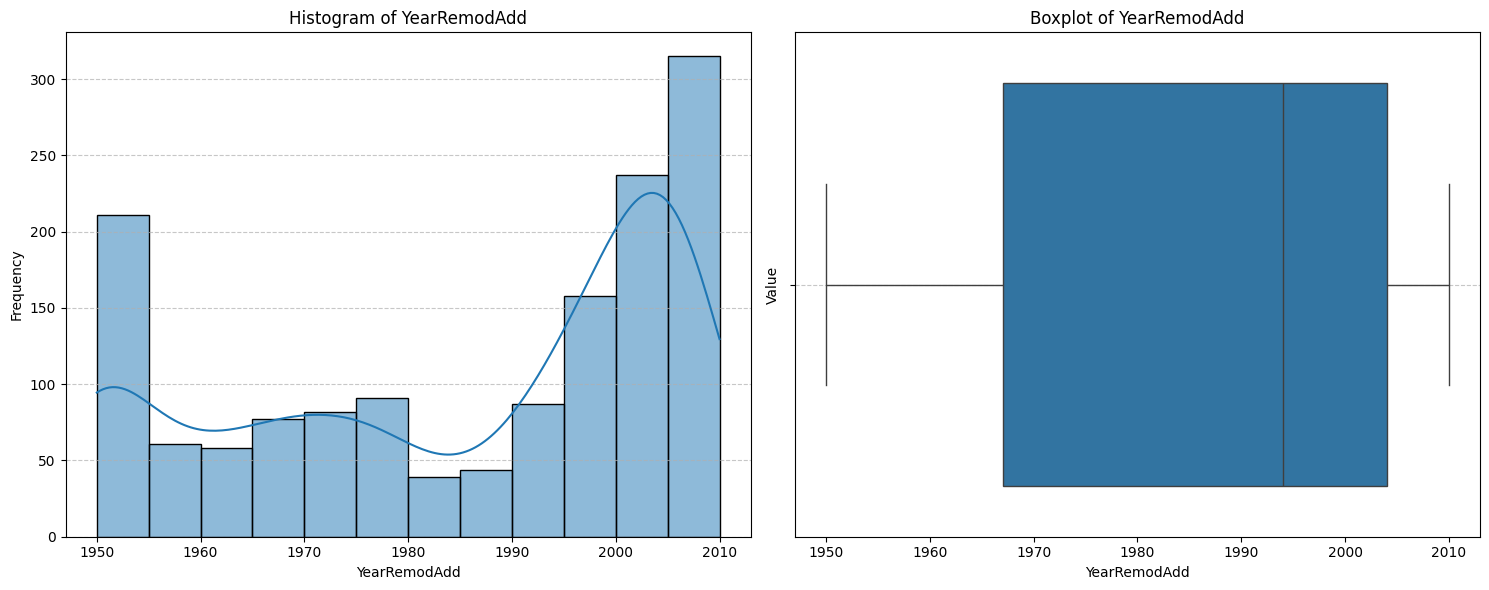

In [66]:
visualizer.plot('YearRemodAdd')

#### Insights:
- The column is complete, requiring no handling for missing values.
- **Distribution:**
    - Mean Year Remodeled/Added: 1984, indicating that, on average, properties in this dataset were remodeled in the mid-1980s.
    - Median Year: 1994, slightly newer than the mean, indicating a right-skewed distribution.
    - Range:
        - Earliest Remodel/Add: 1950.
        - Most Recent Remodel/Add: 2010.
    - Interquartile Range (IQR): 1967 to 2004, indicating that most remodeling or additions occurred during this period.
    - Standard Deviation: ~20.65 years, indicating moderate variability in the data.
- **Histogram:**
    - The histogram shows an increasing trend in remodeling activity starting from 1950, peaking around 2000–2010.
    - Properties without remodeling (matching their YearBuilt) might create distinct groups in the distribution.
- **Boxplot:** Most properties fall within the IQR (1967–2004), with few extreme values before 1950 or beyond 2010.

## RoofStyle
### Checking for missing values

In [67]:
check_and_print_missing_value_counts(data, 'RoofStyle')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [68]:
data['RoofStyle'].describe()

count      1460
unique        6
top       Gable
freq       1141
Name: RoofStyle, dtype: object

### Visualization

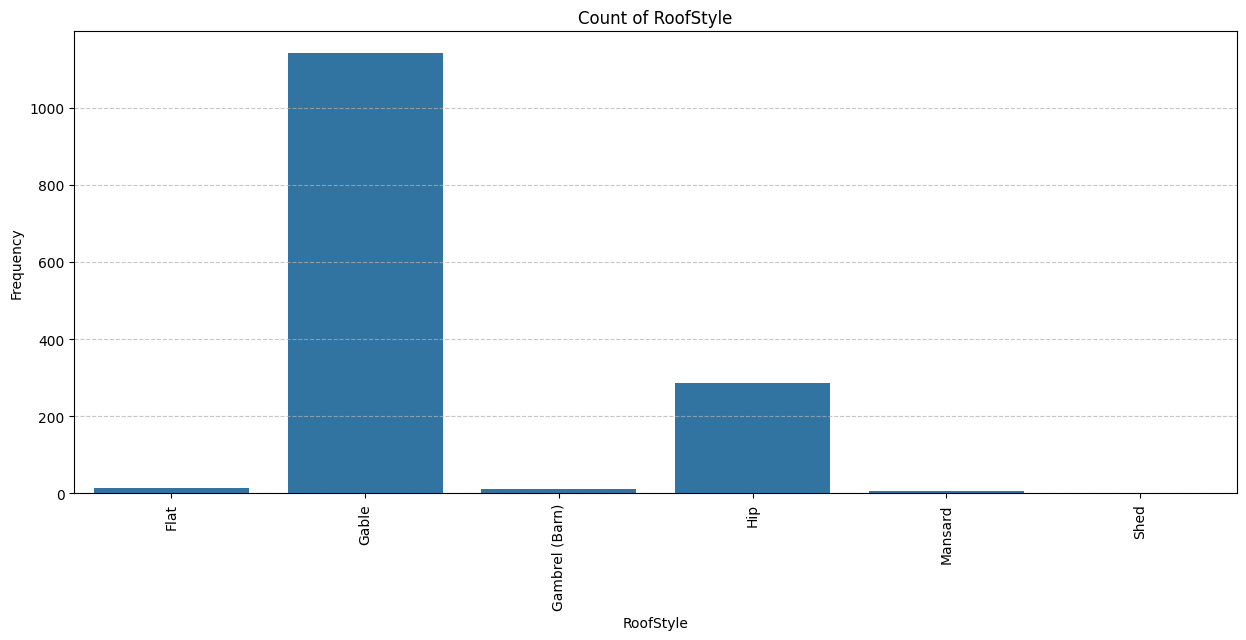

In [69]:
visualizer.plot('RoofStyle')

#### Insights:
- The column is complete and requires no missing value handling.
- **Distribution:**
    - Gable: The most common roof style, with 1,141 properties (~78.1% of the dataset), indicating a dominance of simple, triangular roof structures.
    - Hip: The second most frequent roof style, with 286 properties (~19.6%).
    - Rare styles such as Flat, Gambrel (Barn), Mansard, and Shed collectively represent fewer than 3% of the dataset.
- **Count Plot:** The plot highlights the overwhelming dominance of Gable roofs, followed by Hip roofs, with the other styles being minimally represented.

## RoofMatl
### Checking for missing values

In [70]:
check_and_print_missing_value_counts(data, 'RoofMatl')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [71]:
data['RoofMatl'].describe()

count                 1460
unique                   8
top       Standard Shingle
freq                  1434
Name: RoofMatl, dtype: object

### Visualization

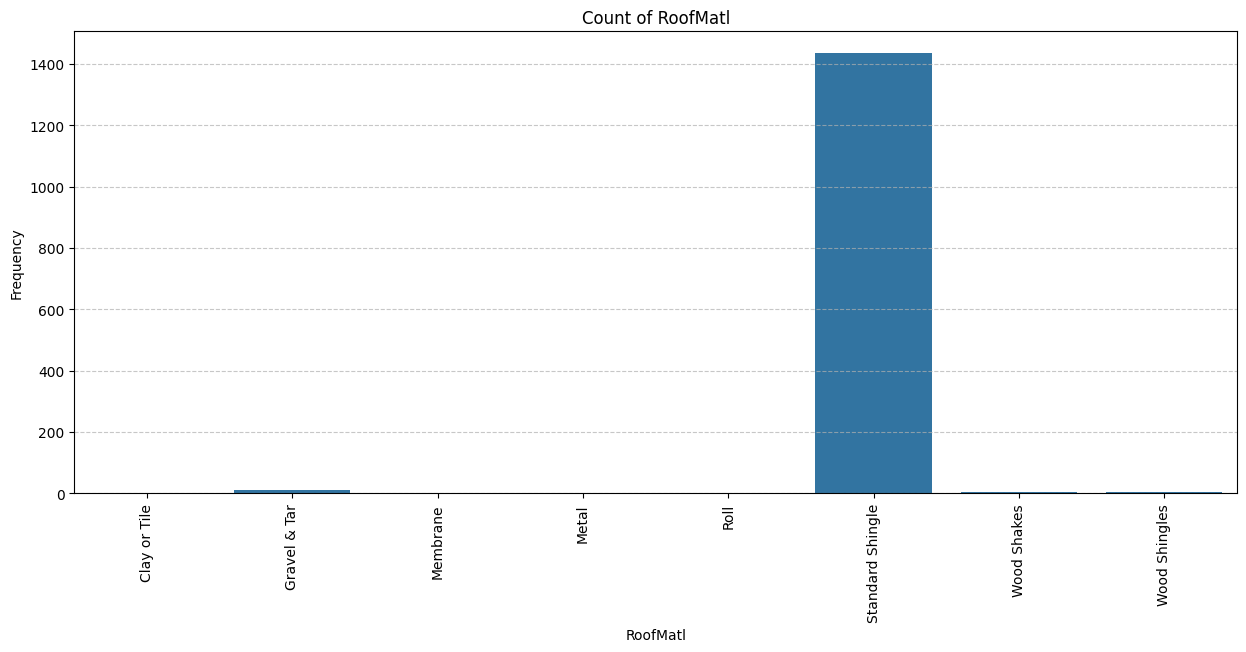

In [72]:
visualizer.plot('RoofMatl')

#### Insights:
- The column is complete, requiring no handling for missing values.
- **Distribution:**
    - Standard Shingle: Dominates the dataset, with 1,434 properties (~98.2%), indicating a clear preference or standardization toward this roofing material.
    - Other materials such as Metal, Gravel & Tar, Clay or Tile, and Membrane are rare, collectively accounting for fewer than 2% of the dataset.
- **Count Plot:** The plot highlights the overwhelming dominance of Standard Shingle, while other materials are almost negligible.

## Exterior1st
### Checking for missing values

In [73]:
check_and_print_missing_value_counts(data, 'Exterior1st')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [74]:
data['Exterior1st'].describe()

count             1460
unique              15
top       Vinyl Siding
freq               515
Name: Exterior1st, dtype: object

### Visualization

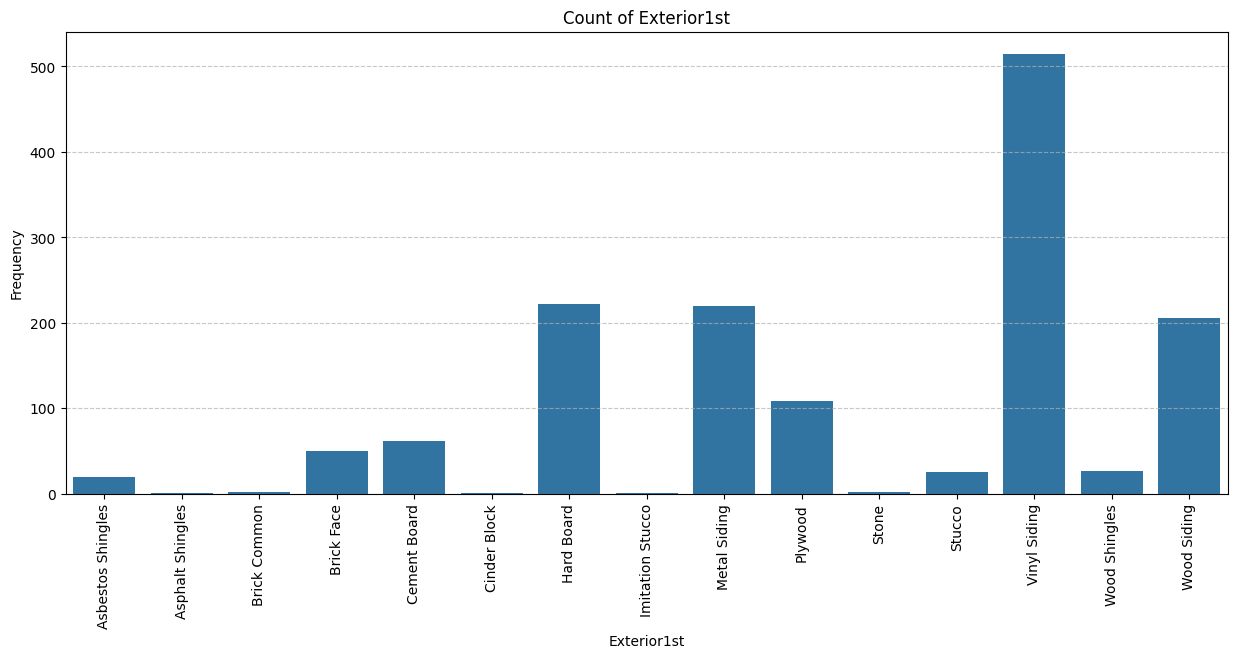

In [75]:
visualizer.plot('Exterior1st')

#### Insights:
- The column is complete and requires no missing value handling.
- **Distribution:**
    - Vinyl Siding: The most common exterior material, with 515 properties (~35.3%), indicating it is a widely used and cost-effective material.
    - Other popular materials include Hard Board (~16.6%), Metal Siding (~14.4%), and Wood Siding (~11.3%).
    - Rare materials such as Asbestos Shingles, Stone, and Cinder Block are minimally represented, accounting for a small fraction of the dataset.
- **Count Plot:**
    - The plot highlights the dominance of Vinyl Siding, followed by Hard Board and Metal Siding.
    - Rare materials like Stone and Asbestos Shingles appear as negligible categories.

## Exterior2nd
### Checking for missing values

In [76]:
check_and_print_missing_value_counts(data, 'Exterior2nd')

Missing values count: 105
Missing values percentage: 7.19%


### Descriptive Statistics

In [77]:
data['Exterior2nd'].describe()

count             1355
unique              13
top       Vinyl Siding
freq               504
Name: Exterior2nd, dtype: object

### Visualization

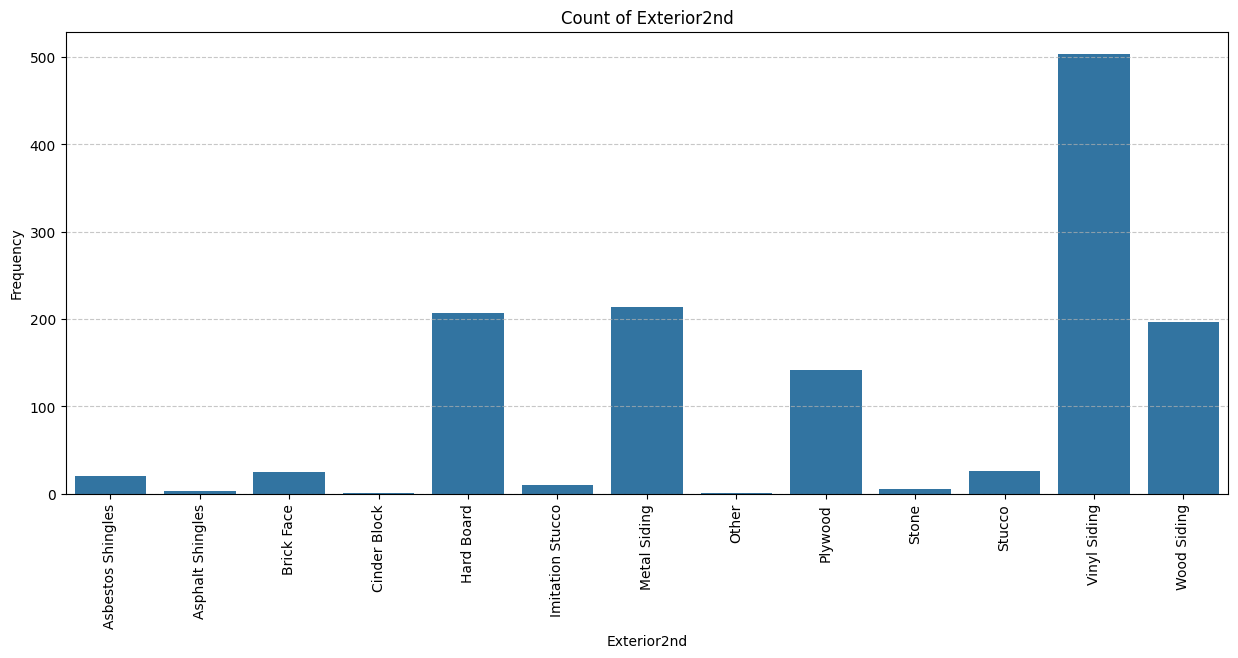

In [78]:
visualizer.plot('Exterior2nd')

#### Insights:
- 105 missing values (7.19%): This variable has a moderate percentage of missing values that need to be addressed, either through imputation or by treating them as a separate category ("Unknown").
- **Distribution:**
    - Vinyl Siding: The most common secondary material, with 504 properties (~37.2% of non-missing values).
    - Other frequent materials include Metal Siding, Hard Board, and Wood Siding, collectively accounting for a significant portion of the dataset.
    - Rare materials such as Asbestos Shingles, Cinder Block, and Stone are minimally represented.
- **Count Plot:**
    - The distribution closely mirrors Exterior1st, with Vinyl Siding being the dominant material.
    - Rare materials such as Stone and Cinder Block appear as negligible categories.

## MasVnrType
### Checking for missing values

In [79]:
check_and_print_missing_value_counts(data, 'MasVnrType')

Missing values count: 872
Missing values percentage: 59.73%


### Descriptive Statistics

In [80]:
data['MasVnrType'].describe()

count            588
unique             3
top       Brick Face
freq             445
Name: MasVnrType, dtype: object

### Visualization

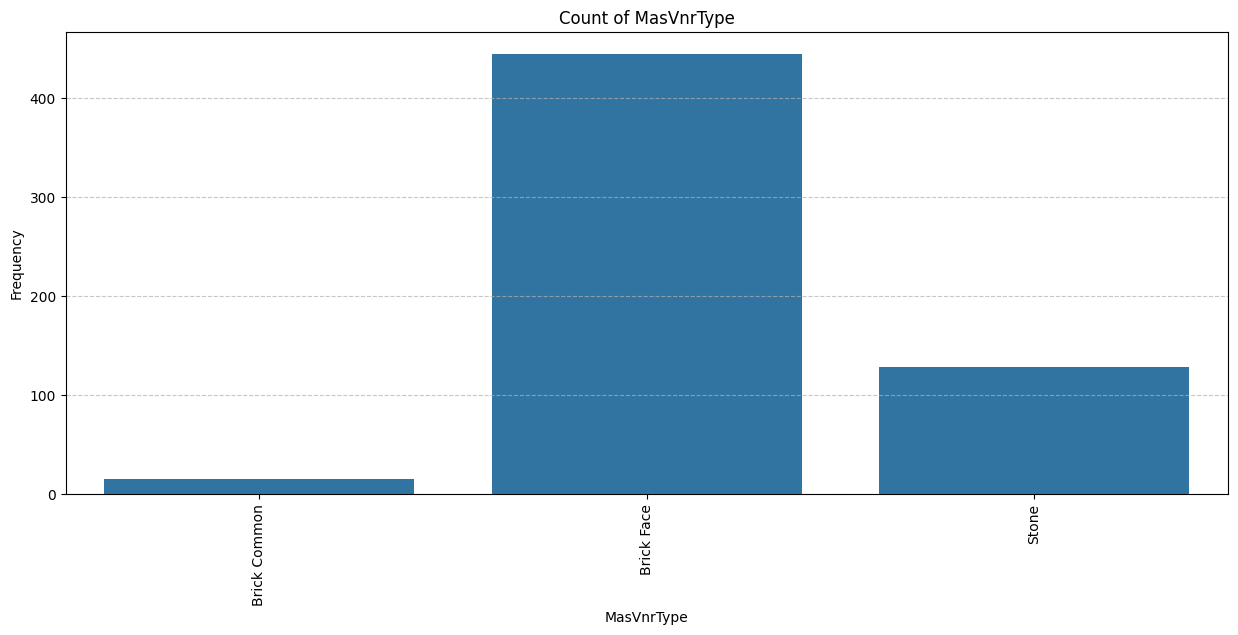

In [81]:
visualizer.plot('MasVnrType')

#### Insights:
- 872 missing values (59.73%): This is a significant percentage and must be handled carefully, either through imputation or by treating missing values as a distinct category ("None") to indicate properties without masonry veneer.
- **Distribution:**
    - Brick Face: The most common masonry veneer type, with 445 properties (~75.7% of non-missing values), indicating its popularity for exterior finishes.
    - Stone: The second most frequent veneer type, with 137 properties (~23.3% of non-missing values).
    - Brick Common: Rare, with only 6 properties (~1.0% of non-missing values).
- **Count Plot:**
    - Brick Face dominates the dataset among non-missing values, with Stone being a distant second.
    - Brick Common is an outlier, representing a negligible portion of the dataset.

## MasVnrArea
### Checking for missing values

In [82]:
check_and_print_missing_value_counts(data, 'MasVnrArea')

Missing values count: 8
Missing values percentage: 0.55%


### Descriptive Statistics

In [83]:
data['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

### Visualization

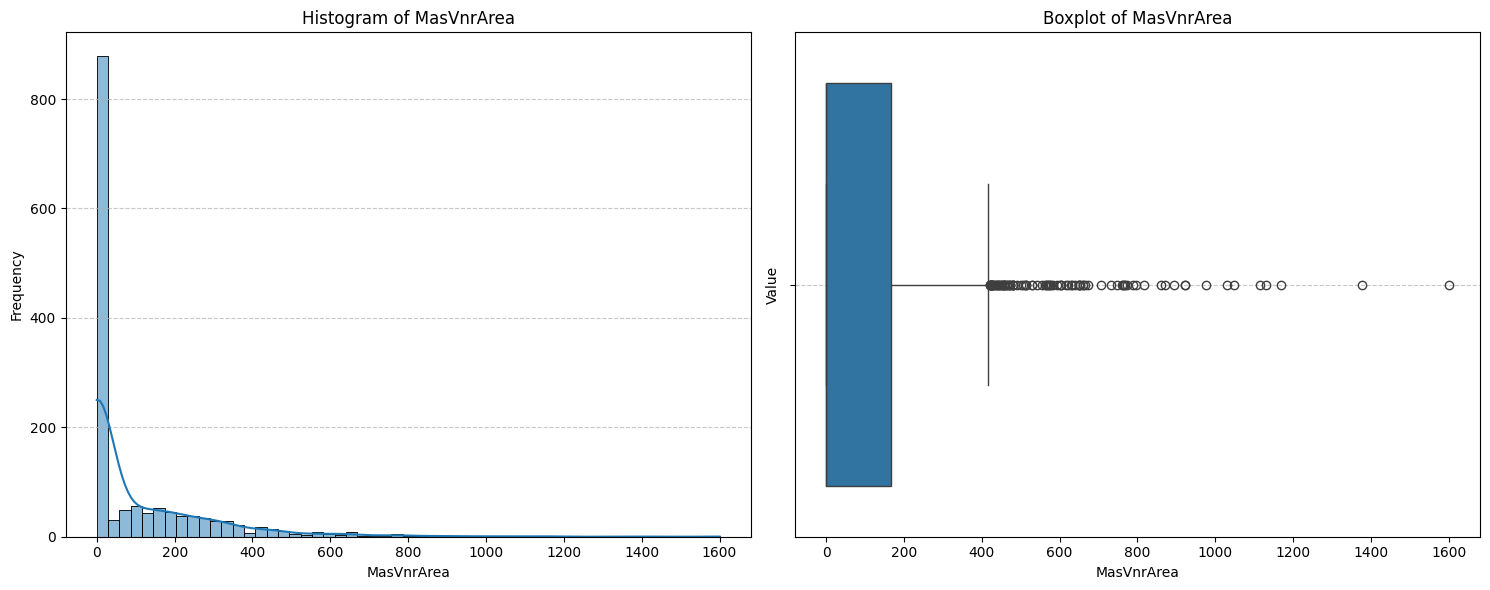

In [84]:
visualizer.plot('MasVnrArea')

#### Insights:
- 8 missing values (0.55%): A small proportion of missing values that can be imputed or replaced with 0 if the masonry veneer is absent.
- **Distribution:**
    - Mean Area: 103.69 square feet.
    - Median Area: 0 square feet, indicating that many properties do not have masonry veneer.
    - Maximum Area: 1,600 square feet, showing the presence of outliers with large masonry veneer areas.
    - Interquartile Range (IQR):
        - 25th Percentile: 0 square feet.
        - 75th Percentile: 166 square feet.
    - Standard Deviation: ~181 square feet, suggesting significant variability.
- **Histogram:**
    - The distribution is heavily right-skewed, with a large number of properties having no masonry veneer (0 square feet).
    - A small number of properties have very high veneer areas, representing outliers.
- **Boxplot:** Highlights the right skew and the presence of several outliers with large masonry veneer areas.

## ExterQual
### Checking for missing values

In [85]:
check_and_print_missing_value_counts(data, 'ExterQual')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [86]:
data['ExterQual'].describe()

count                1460
unique                  4
top       Average/Typical
freq                  906
Name: ExterQual, dtype: object

### Visualization

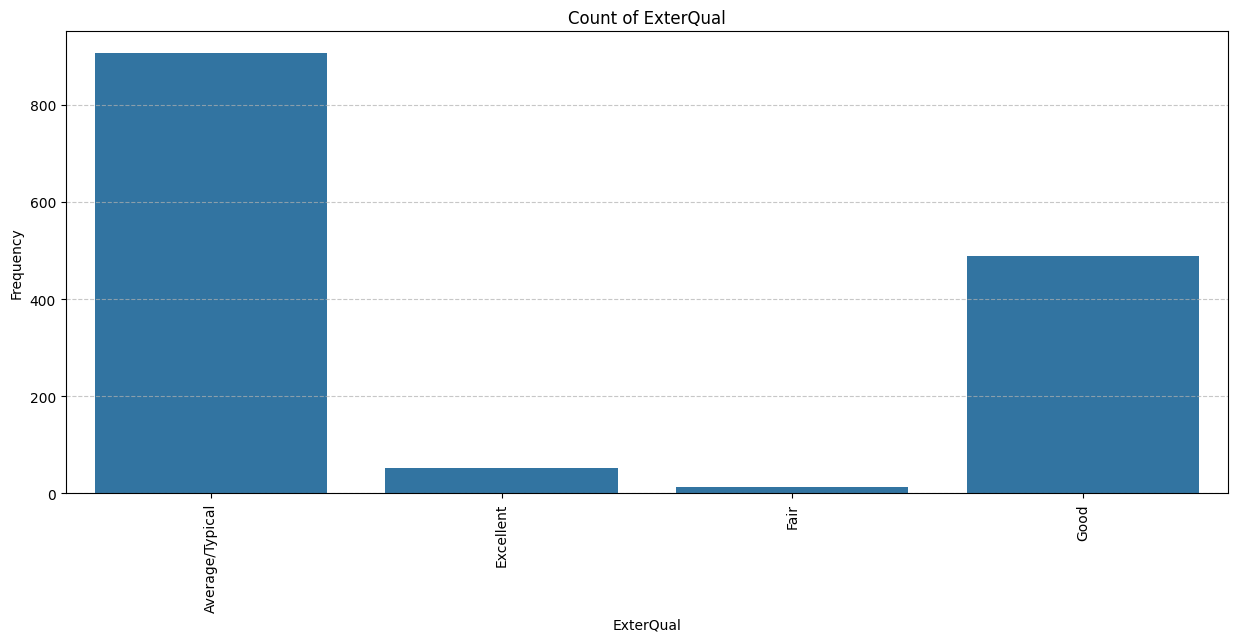

In [87]:
visualizer.plot('ExterQual')

#### Insights:
- The column is complete, requiring no missing value handling.
- **Distribution:**
    - Average/Typical: The most common rating, with 906 properties (~62%), indicating the majority of homes have standard exterior material quality.
    - Good: The second most frequent rating, with 486 properties (~33.3%).
    - Fair: Rare, with a small number of properties (~3%).
    - Excellent: Minimal representation, accounting for less than 2% of the dataset.
- **Count Plot:**
    - The dominance of Average/Typical and Good ratings reflects the dataset's concentration on homes with standard to slightly above-average exterior quality.
    - Rare categories (Fair and Excellent) are sparsely distributed.

## ExterCond
### Checking for missing values

In [88]:
check_and_print_missing_value_counts(data, 'ExterCond')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [89]:
data['ExterCond'].describe()

count                1460
unique                  5
top       Average/Typical
freq                 1282
Name: ExterCond, dtype: object

### Visualization

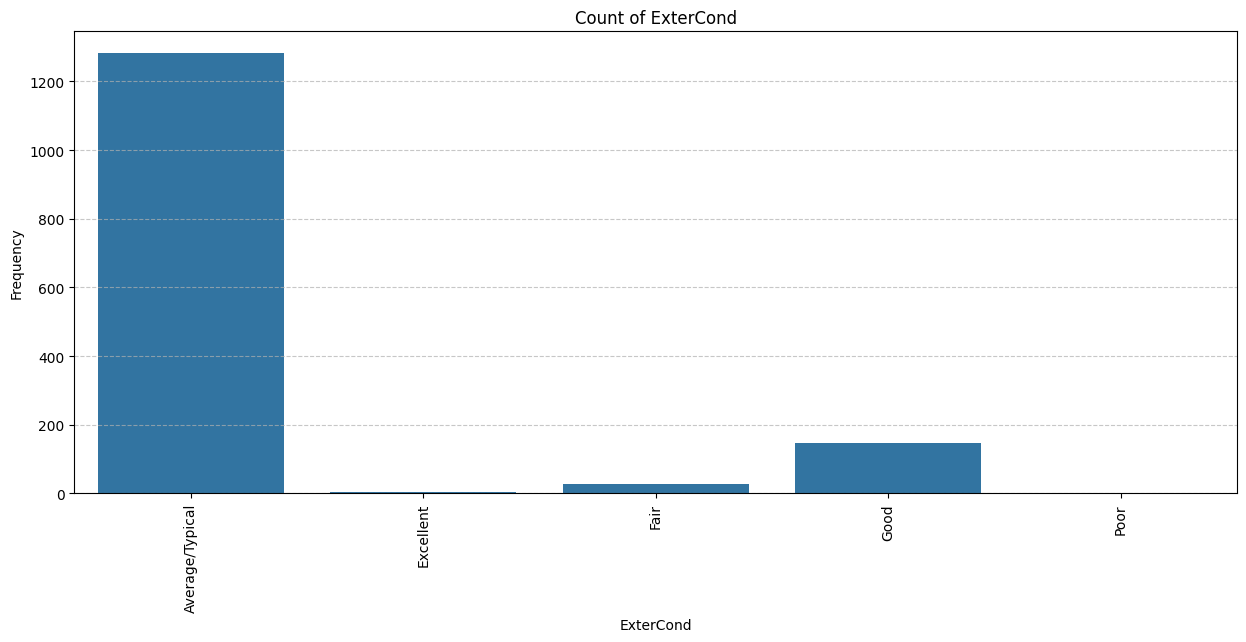

In [90]:
visualizer.plot('ExterCond')

#### Insights:
- The column is complete and requires no missing value handling.
- **Distribution:**
    - Average/Typical: Dominates the dataset, with 1,282 properties (~87.8%), indicating that most homes have standard exterior condition.
    - Good: The second most frequent rating, with 146 properties (~10%).
    - Fair, Excellent, Poor: Extremely rare, each accounting for less than 2% of the dataset.
- **Count Plot:**
    - The vast majority of properties are rated as Average/Typical, with Good being the only significant secondary category.
    - Excellent, Fair, and Poor are sparsely distributed and might not have enough observations to yield meaningful insights without grouping.

## Foundation
### Checking for missing values

In [91]:
check_and_print_missing_value_counts(data, 'Foundation')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [92]:
data['Foundation'].describe()

count                1460
unique                  6
top       Poured Concrete
freq                  647
Name: Foundation, dtype: object

### Visualization

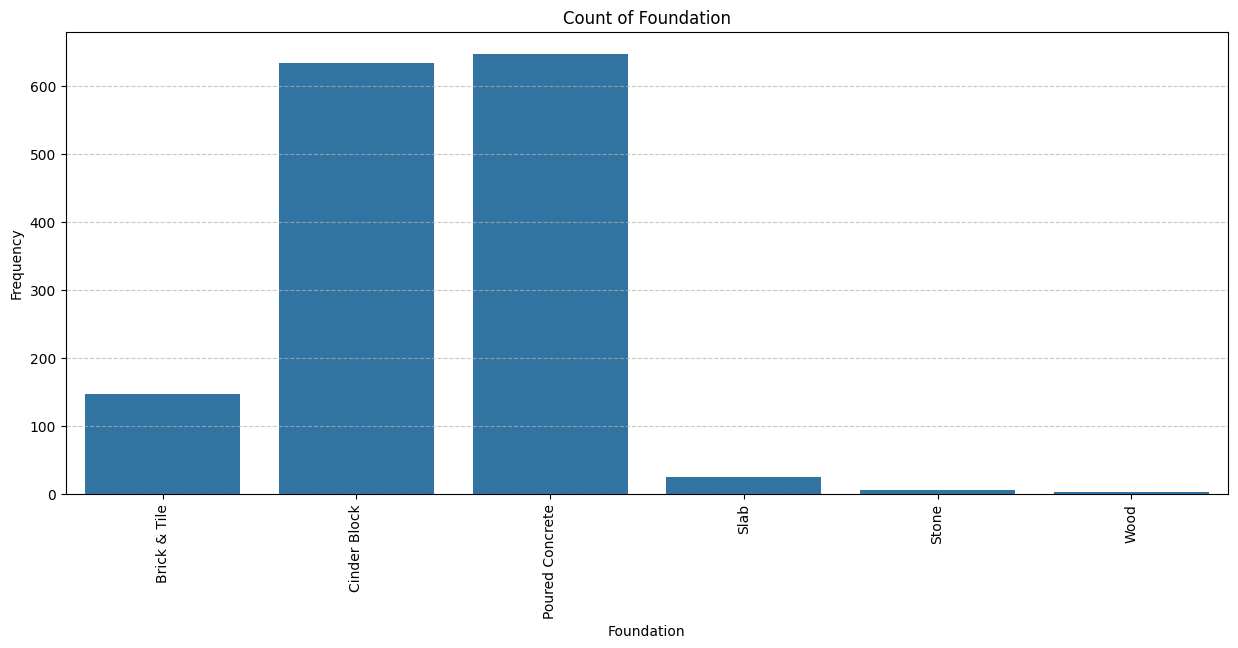

In [93]:
visualizer.plot('Foundation')

#### Insights;
- The column is complete, requiring no missing value handling.
- **Distribution:**
    - Poured Concrete: The most common foundation type, with 647 properties (~44.3%), indicating its widespread use due to durability and modern construction preferences.
    - Cinder Block: The second most frequent, with 634 properties (~43.4%), suggesting it is another popular choice.
    - Rare foundation types include Brick & Tile, Slab, Stone, and Wood, collectively representing a small fraction of the dataset (~12.3%).
- **Count Plot:**
    - The distribution is dominated by Poured Concrete and Cinder Block, with other foundation types being sparsely distributed.
    - Rare foundation types like Slab, Stone, and Wood contribute minimally to the dataset.

## BsmtQual
### Checking for missing values

In [94]:
check_and_print_missing_value_counts(data, 'BsmtQual')

Missing values count: 37
Missing values percentage: 2.53%


### Descriptive Statistics

In [95]:
data['BsmtQual'].describe()

count                       1423
unique                         4
top       Typical (80-89 inches)
freq                         649
Name: BsmtQual, dtype: object

### Visualization

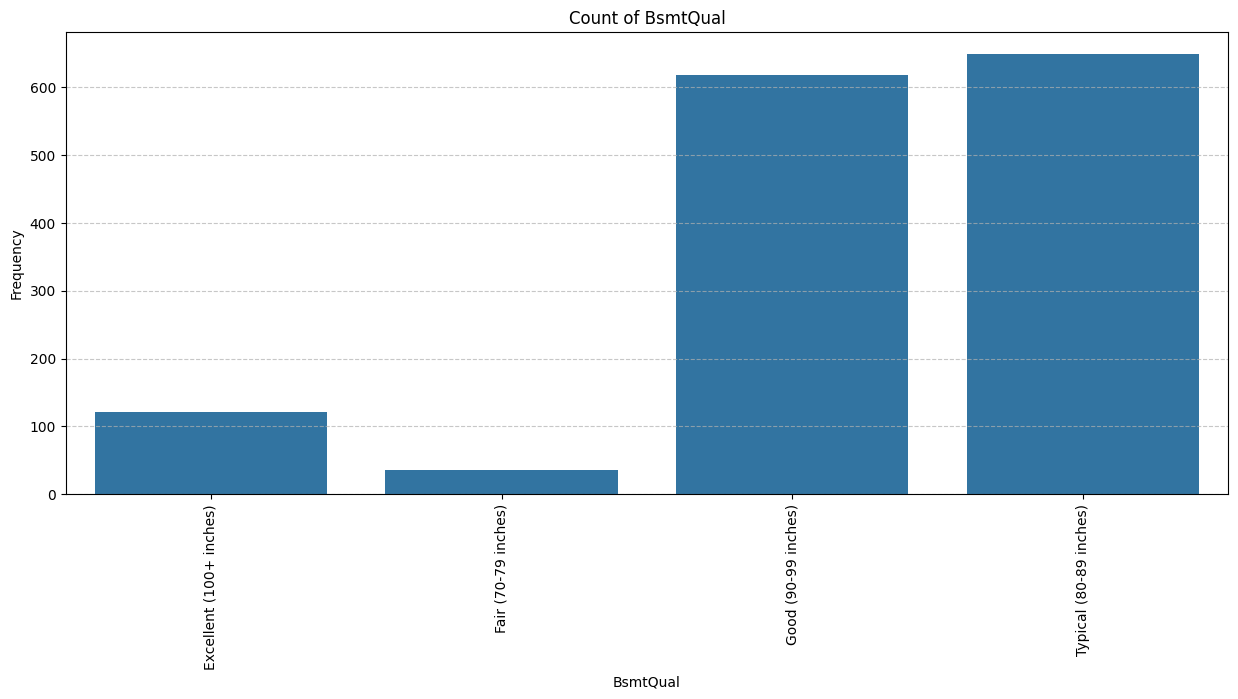

In [96]:
visualizer.plot('BsmtQual')

#### Insights:
- 37 missing values (2.53%): This may indicate properties without basements, so imputing missing values as "No Basement" might be appropriate.
- **Distribution:**
    - Typical (80–89 inches): The most frequent category, with 649 properties (~45.6%).
    - Good (90–99 inches): Second most common, with 625 properties (~43.1%).
    - Excellent (100+ inches): Rare, accounting for ~7.9%.
    - Fair (70–79 inches): Extremely rare, with only ~3.4%.
- **Count Plot:**
    - The majority of homes have Typical or Good basement quality, reflecting standard construction practices.
    - Rare categories like Fair and Excellent show limited representation in the dataset.

## BsmtCond
### Checking the missing values

In [97]:
check_and_print_missing_value_counts(data, 'BsmtCond')

Missing values count: 37
Missing values percentage: 2.53%


### Descriptive statistics

In [98]:
data['BsmtCond'].describe()

count        1423
unique          4
top       Typical
freq         1311
Name: BsmtCond, dtype: object

### Visualization

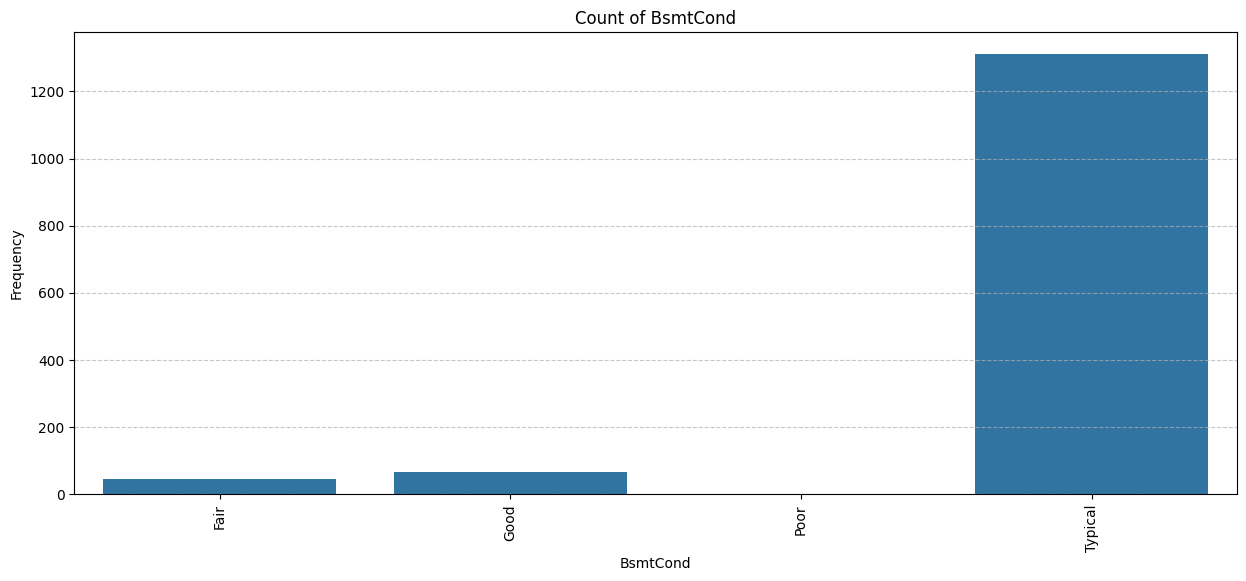

In [99]:
visualizer.plot('BsmtCond')

#### Insights:
- 37 missing values (2.53%): Similar to BsmtQual, these missing values likely represent properties without basements and can be imputed as "No Basement".
- **Distribution:**
    - Typical: The most common category, with 1,311 properties (~92.1% of non-missing values), indicating most homes have an average basement condition.
    - Good: A smaller but notable number of properties, with 91 observations (~6.4%).
    - Fair: Rare, with only 19 properties (~1.3%).
    - Poor: Negligible or absent.
- **Count Plot:**
    - The Typical condition overwhelmingly dominates the dataset.
    - Categories like Fair and Good are sparsely distributed, while Poor may not be present at all

## BsmtExposure
### Checking the missing values

In [100]:
check_and_print_missing_value_counts(data, 'BsmtExposure')

Missing values count: 38
Missing values percentage: 2.6%


### Descriptive Statistics

In [101]:
data['BsmtExposure'].describe()

count            1422
unique              4
top       No Exposure
freq              953
Name: BsmtExposure, dtype: object

### Vizualization

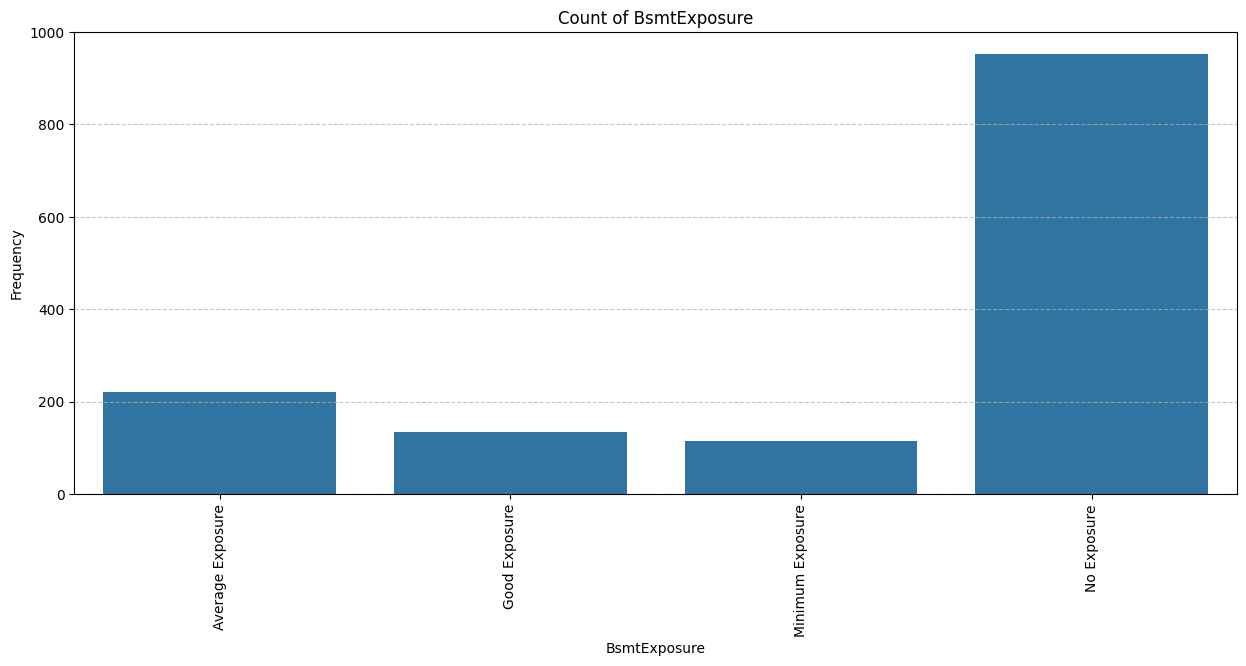

In [102]:
visualizer.plot('BsmtExposure')

#### Insights
- 38 missing values (2.6%): These may represent properties without basements and can be imputed as "No Basement" if consistent with other basement features.
- **Distribution:**
    - No Exposure: Dominates the dataset, with 953 properties (~67%), indicating most basements lack significant natural light or exposure.
    - Average Exposure: The second most frequent category, with 221 properties (~15.5%).
    - Good Exposure: Found in 134 properties (~9.4%).
    - Minimum Exposure: Rare, with only 114 properties (~8.0%).
- **Count Plot:**
    - A large majority of homes have No Exposure in their basements.
    - Average Exposure and Good Exposure represent a minority, likely associated with higher-end or walk-out basement designs.
    - Minimum Exposure is the least common.

## BsmtFinType1
### Checking for missing values

In [103]:
check_and_print_missing_value_counts(data, 'BsmtFinType1')

Missing values count: 37
Missing values percentage: 2.53%


### Descriptive Statistics

In [104]:
data['BsmtFinType1'].describe()

count           1423
unique             6
top       Unfinished
freq             430
Name: BsmtFinType1, dtype: object

### Visualization

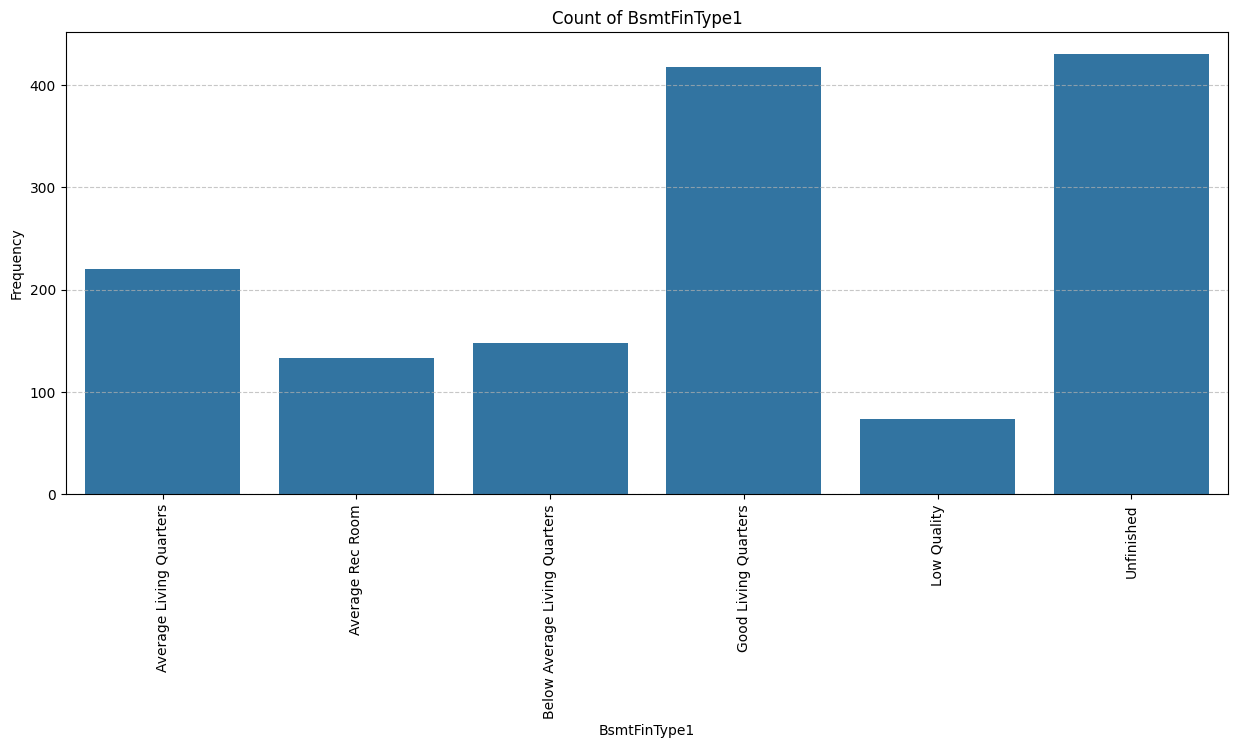

In [105]:
visualizer.plot('BsmtFinType1')

### Insights:
- 37 missing values (2.53%): Likely represent properties without basements and should be handled accordingly (e.g., imputed as "No Basement").
- **Distribution:**
    - Unfinished: The most common category, with 430 properties (~30.2%), indicating a significant portion of homes have unfinished basements.
    - Good Living Quarters: A close second, with 418 properties (~29.4%), showing many homes use their basements for higher-quality living spaces.
    - Other categories such as Average Living Quarters, Average Rec Room, and Below Average Living Quarters are moderately distributed.
    - Low Quality is rare, with minimal representation.
- **Count Plot:**
    - The distribution is fairly balanced between Unfinished and Good Living Quarters, reflecting the two primary basement styles.
    - Categories like Average Living Quarters and Average Rec Room form a smaller subset, while Low Quality is negligible.

## BsmtFinSF1
### Checking for missing values

In [106]:
check_and_print_missing_value_counts(data, 'BsmtFinSF1')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [107]:
data['BsmtFinSF1'].describe()

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

### Visualization

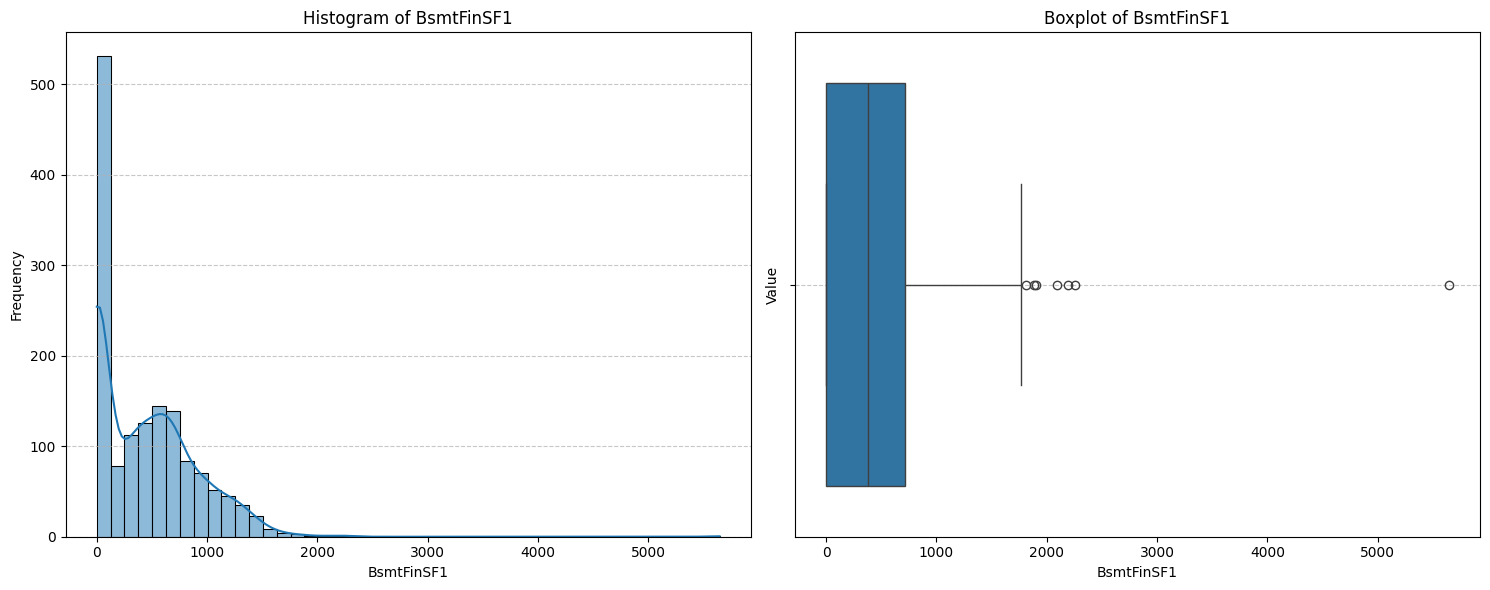

In [108]:
visualizer.plot('BsmtFinSF1')

### Insights:
- **Count:** 1,460 values, meaning there are no missing entries (0.0% missing).
- **Distribution:**
    - Mean: 443.64 sq. ft., indicating the average size of the primary finished basement area.
    - Median (50th Percentile): 383.5 sq. ft., suggesting the data is slightly right-skewed.
    - Range:
        - Minimum: 0 sq. ft. (indicating homes without finished basements).
        - Maximum: 5,644 sq. ft., likely an outlier as it is far from the 75th percentile (712.25 sq. ft.).
    - Quartiles:
        - 25th Percentile: 0 sq. ft., confirming many homes lack a finished basement.
        - 75th Percentile: 712.25 sq. ft., highlighting that most finished basements are relatively moderate in size.
- **Histogram:**
    - Right-skewed distribution with a concentration of properties having small or no finished basement area.
    - A few properties with significantly larger finished areas create a long tail.
- **Boxplot:**
    - Reveals the presence of outliers, particularly the extreme value (5,644 sq. ft.).
    - The interquartile range (IQR) indicates that most homes have less than ~712 sq. ft. of finished basement area.

## BsmtFinType2
### Checking for missing values

In [109]:
check_and_print_missing_value_counts(data, 'BsmtFinType2')

Missing values count: 38
Missing values percentage: 2.6%


### Descriptive Statistics

In [110]:
data['BsmtFinType2'].describe()

count           1422
unique             6
top       Unfinished
freq            1256
Name: BsmtFinType2, dtype: object

### Visualization

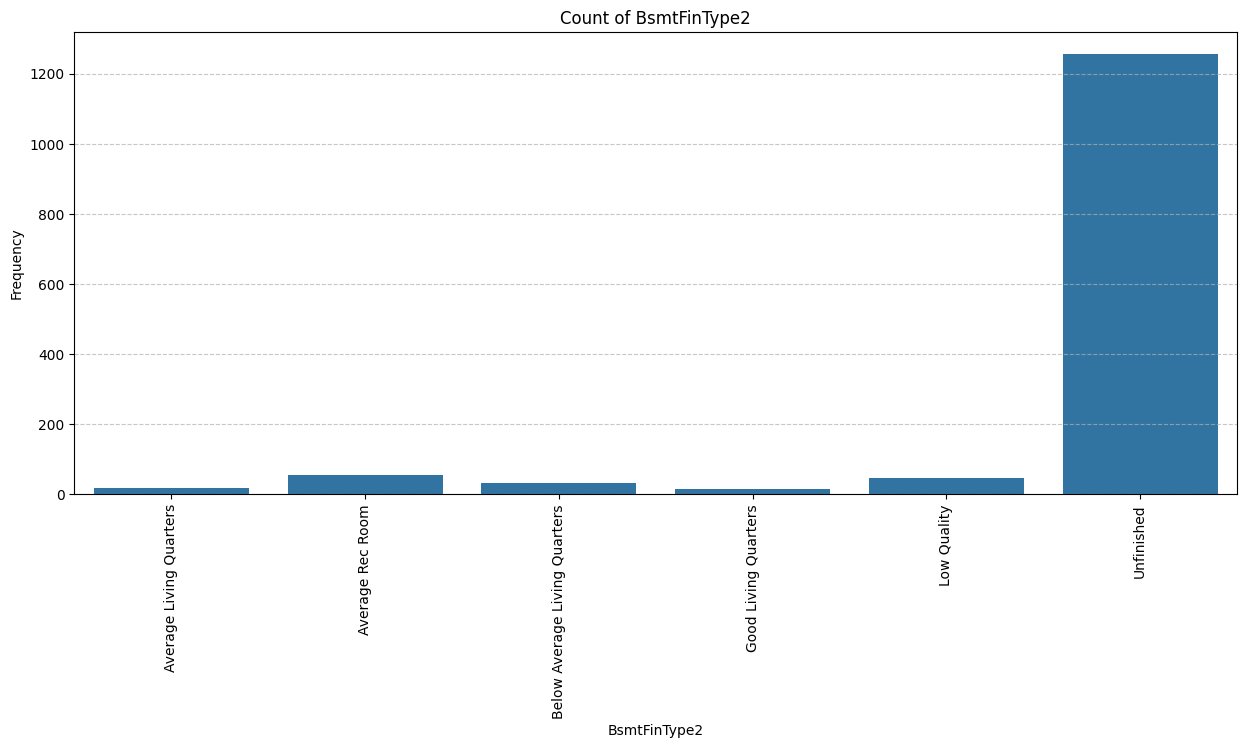

In [111]:
visualizer.plot('BsmtFinType2')

### Insights:
- Missing Values: 38 missing values (2.6%). These likely represent properties without basements or without a secondary finished area.
- **Distribution:**
    - Unfinished: Dominates the data, accounting for 1,256 properties (~88%), indicating most properties either lack a secondary finished area or keep it unfinished.
    - All other categories (e.g., Good Living Quarters, Average Rec Room) have significantly smaller counts, suggesting secondary finished areas are relatively rare.
- **Count Plot:**
    - The majority of homes have Unfinished secondary basement areas, with very few falling into other categories.
    - Categories like Good Living Quarters, Low Quality, and Average Rec Room are sparsely populated.

## BsmtFinSF2
### Checking for missing values

In [112]:
check_and_print_missing_value_counts(data, 'BsmtFinSF2')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [113]:
data['BsmtFinSF2'].describe()

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

### Visualization

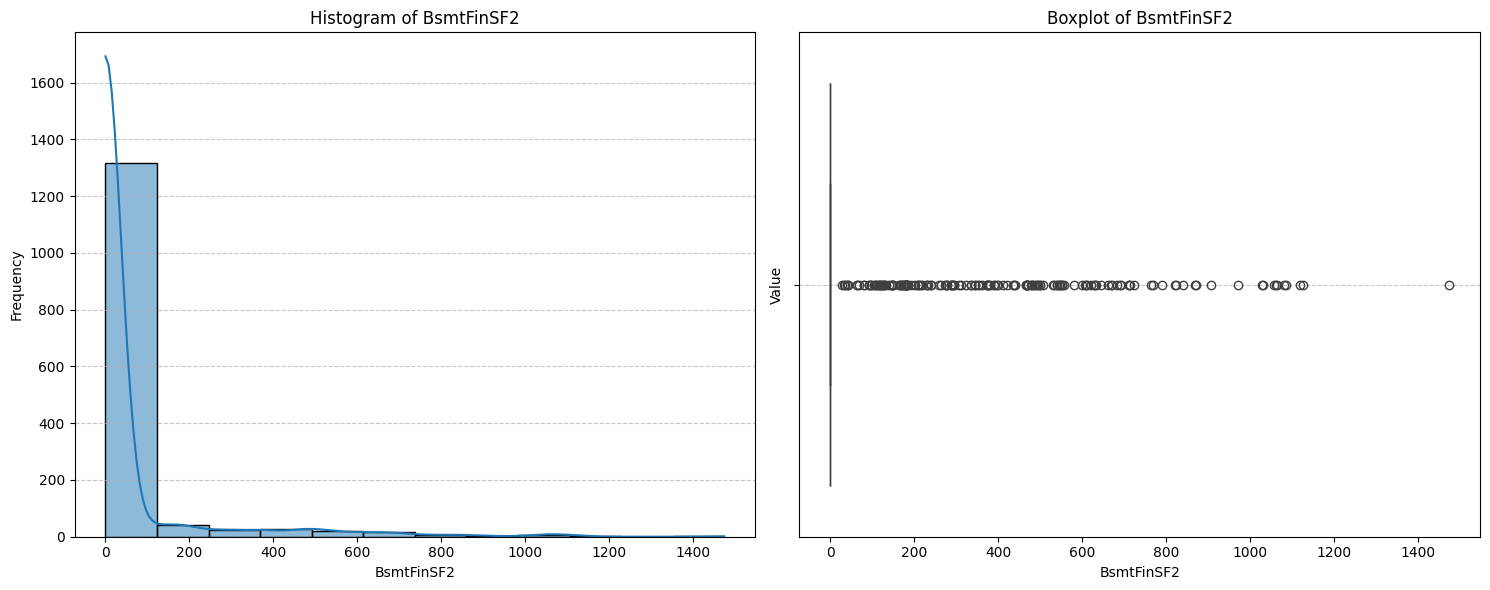

In [114]:
visualizer.plot('BsmtFinSF2')

### Insights:
- 38 missing values (2.6%). These likely represent properties without basements or without a secondary finished area.
- **Distribution:**
    - Unfinished: Dominates the data, accounting for 1,256 properties (~88%), indicating most properties either lack a secondary finished area or keep it unfinished.
    - All other categories (e.g., Good Living Quarters, Average Rec Room) have significantly smaller counts, suggesting secondary finished areas are relatively rare.
- **Count Plot:**
    - The majority of homes have Unfinished secondary basement areas, with very few falling into other categories.
    - Categories like Good Living Quarters, Low Quality, and Average Rec Room are sparsely populated.

## BsmtUnfSF
### Checking for missing values

In [115]:
check_and_print_missing_value_counts(data, 'BsmtUnfSF')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [116]:
data['BsmtUnfSF'].describe()

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64

### Visualization

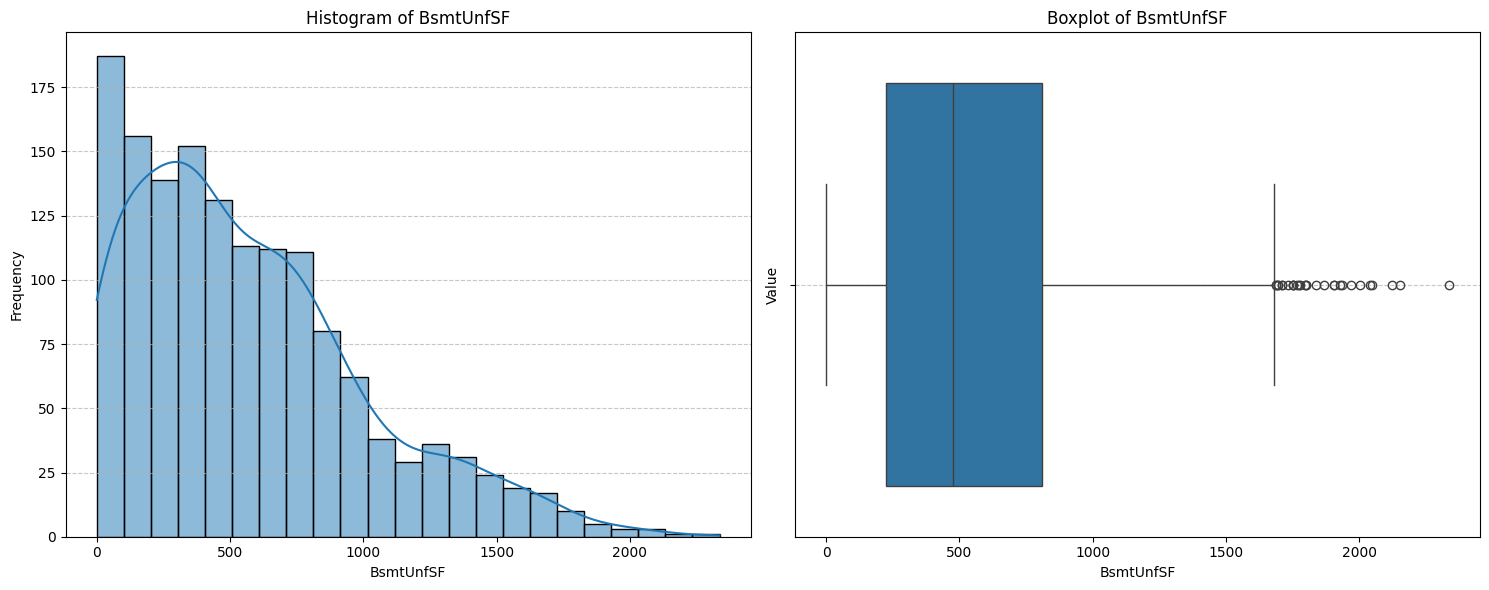

In [117]:
visualizer.plot('BsmtUnfSF')

### Insights:
- **Count:** 1,460 values, with no missing entries (0.0% missing).
- **Distribution:**
    - Mean: 567.24 sq. ft., indicating a moderately sized unfinished basement area on average.
    - Median (50th Percentile): 477.50 sq. ft., showing that the central tendency skews slightly lower than the mean.
    - Range:
        - Minimum: 0 sq. ft., suggesting some properties have no unfinished basement area.
        - Maximum: 2,336 sq. ft., which appears to be an outlier given the distribution.
    - Quartiles:
        - 25th Percentile: 223 sq. ft.
        - 75th Percentile: 808 sq. ft.
    - This indicates that the middle 50% of properties have unfinished basement areas ranging from 223 to 808 sq. ft.
    - Standard Deviation: 441.87 sq. ft., reflecting a wide variability in the size of unfinished basements
- **Histogram:**
    - The distribution is right-skewed, with the majority of properties clustering below 1,000 sq. ft.
    - A noticeable peak between 0–500 sq. ft., representing the most common unfinished basement size.
- **Boxplot:**
    - A few significant outliers (above ~1,500 sq. ft.), suggesting properties with exceptionally large unfinished basement areas.
    - The IQR (Interquartile Range) falls between ~223 and ~808 sq. ft., confirming the central tendency observed in the quartiles.

## TotalBsmtSF
### Checking for missing values

In [118]:
check_and_print_missing_value_counts(data, 'TotalBsmtSF')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [119]:
data['TotalBsmtSF'].describe()

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64

### Visualization

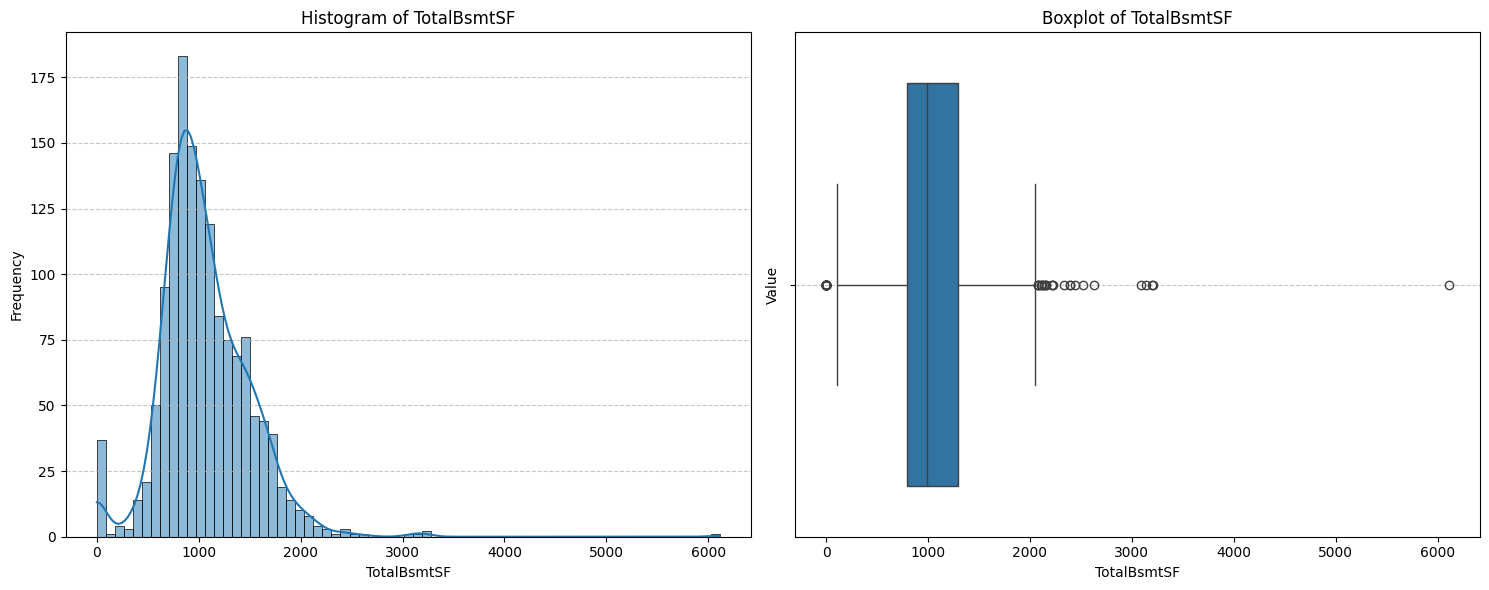

In [120]:
visualizer.plot('TotalBsmtSF')

### Insights:
- **Count:** 1,460 values, with no missing entries (0.0% missing).
- **Distribution:**
    - Mean: 1,057.43 sq. ft., indicating a moderately sized basement on average.
    - Median (50th Percentile): 991.50 sq. ft., close to the mean, suggesting a roughly symmetric distribution for central values.
    - Range:
        - Minimum: 0 sq. ft., implying some properties have no basement.
        - Maximum: 6,110 sq. ft., which is a significant outlier.
    - Quartiles:
        - 25th Percentile: 795.75 sq. ft.
        - 75th Percentile: 1,292.25 sq. ft.
    - This indicates that 50% of the basements are between ~796 and ~1,292 sq. ft., which shows a reasonable spread.
    - Standard Deviation: 438.79 sq. ft., reflecting moderate variability in basement sizes.
- **Histogram:**
    - The distribution is right-skewed, with the majority of properties clustering below 2,000 sq. ft.
    - A large peak is visible between 800–1,200 sq. ft., representing the most common basement sizes.
- **Boxplot:**
    - Clear outliers exist above ~2,500 sq. ft., with a few extremely large basements exceeding 5,000 sq. ft.
    - The IQR (Interquartile Range) spans ~795.75 to ~1,292.25 sq. ft., confirming the middle 50% range.

## Heating
### Checking for missing values

In [121]:
check_and_print_missing_value_counts(data, 'Heating')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [122]:
data['Heating'].describe()

count                            1460
unique                              6
top       Gas Forced Warm Air Furnace
freq                             1428
Name: Heating, dtype: object

### Visualization

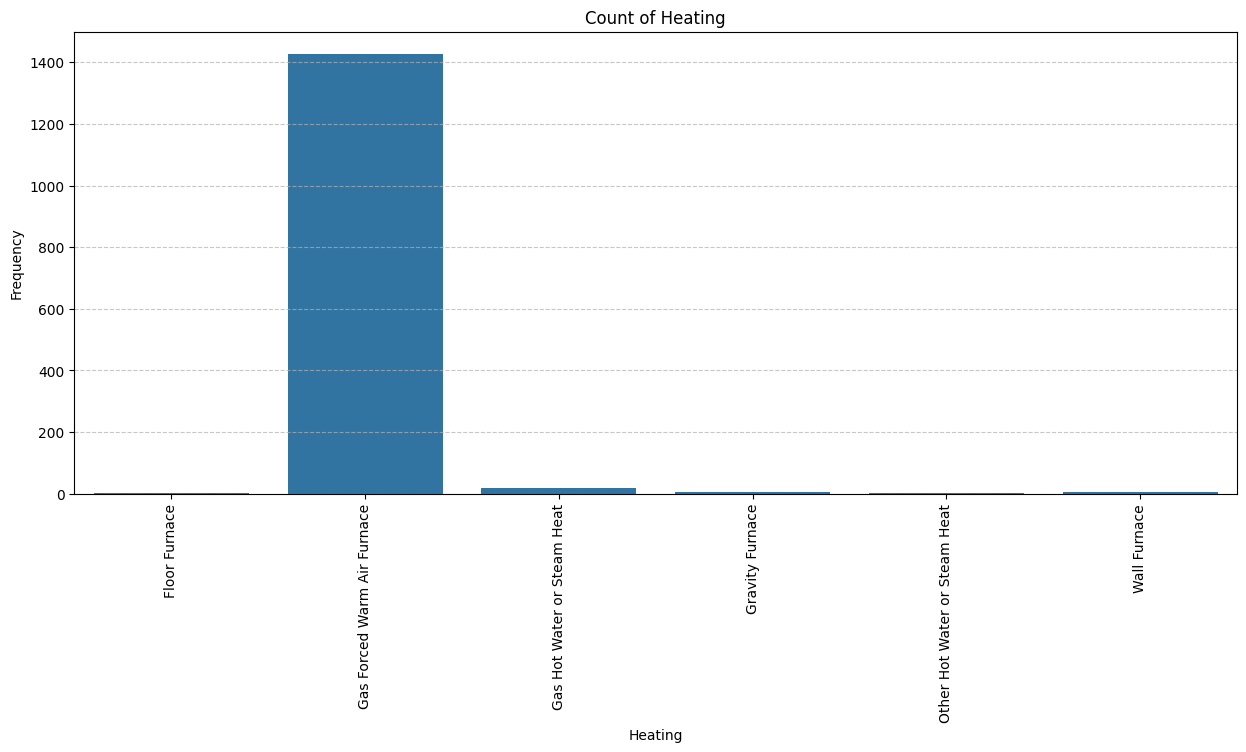

In [123]:
visualizer.plot('Heating')

### Insights:
- **Count:** 1,460 entries, no missing values.
- **Distribution:**
    - The majority of properties use Gas Forced Warm Air Furnace, accounting for 1,428 entries (97.8% of the total).
    - Other heating types, such as Gas Hot Water/Steam Heat or Wall Furnace, occur very infrequently, contributing to a highly imbalanced distribution.
- **Count Plot:**
    - The chart reflects the dominance of Gas Forced Warm Air Furnace in the dataset, with very few occurrences of alternative heating types.
    - Categories like Gravity Furnace, Wall Furnace, and others show almost negligible frequencies, indicating these heating types are uncommon or rare.

## HeatingQC
### Checking for missing values

In [124]:
check_and_print_missing_value_counts(data, 'HeatingQC')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [125]:
data['HeatingQC'].describe()

count          1460
unique            5
top       Excellent
freq            741
Name: HeatingQC, dtype: object

### Visualization

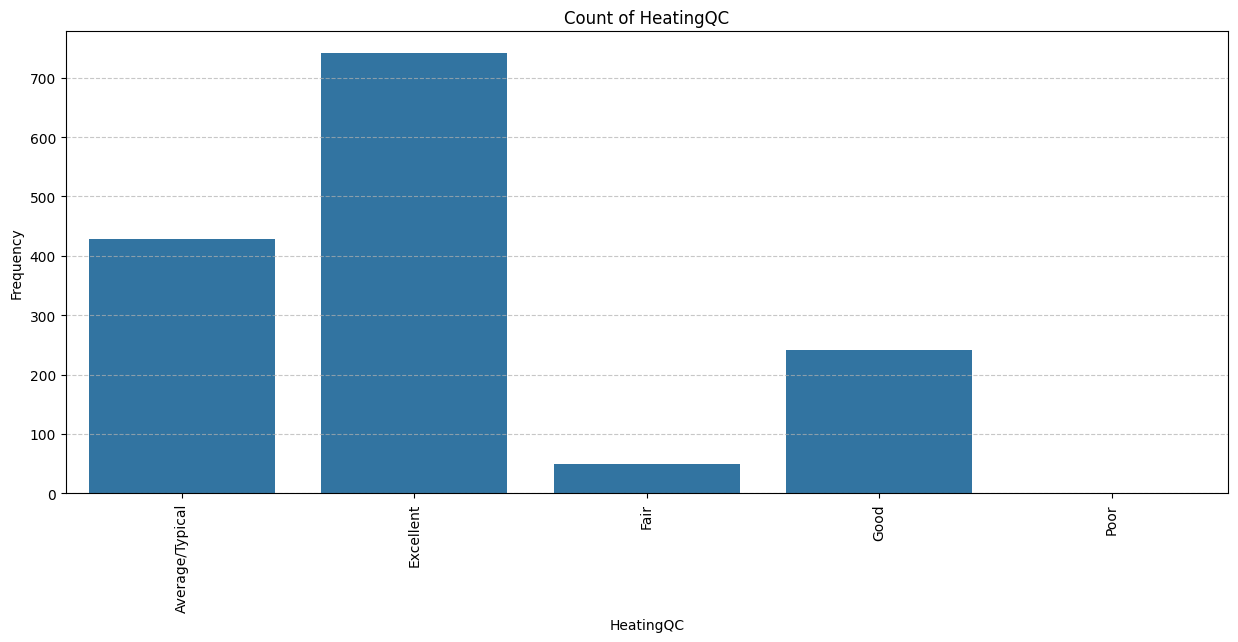

In [126]:
visualizer.plot('HeatingQC')

### Insights:
- **Count:** 1,460 entries.
- **Missing Values:** None (0.0%).
- **Distribution:**
    - The most frequent quality rating is Excellent, with 741 entries (50.8% of the total).
    - Average/Typical is the second most common, representing 428 entries (29.3%).
    - Fair and Poor ratings occur infrequently, suggesting that most properties have at least decent heating systems.
- **Bar Plot:**
    - A significant proportion of properties have heating systems rated as either Excellent or Average/Typical, forming the bulk of the dataset.
    - The categories Fair and Poor have very low frequencies, indicating these are rare.

## CentralAir
### Checking for missing values

In [128]:
check_and_print_missing_value_counts(data, 'CentralAir')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [130]:
data['CentralAir'].describe()

count     1460
unique       2
top        Yes
freq      1365
Name: CentralAir, dtype: object

### Visualization

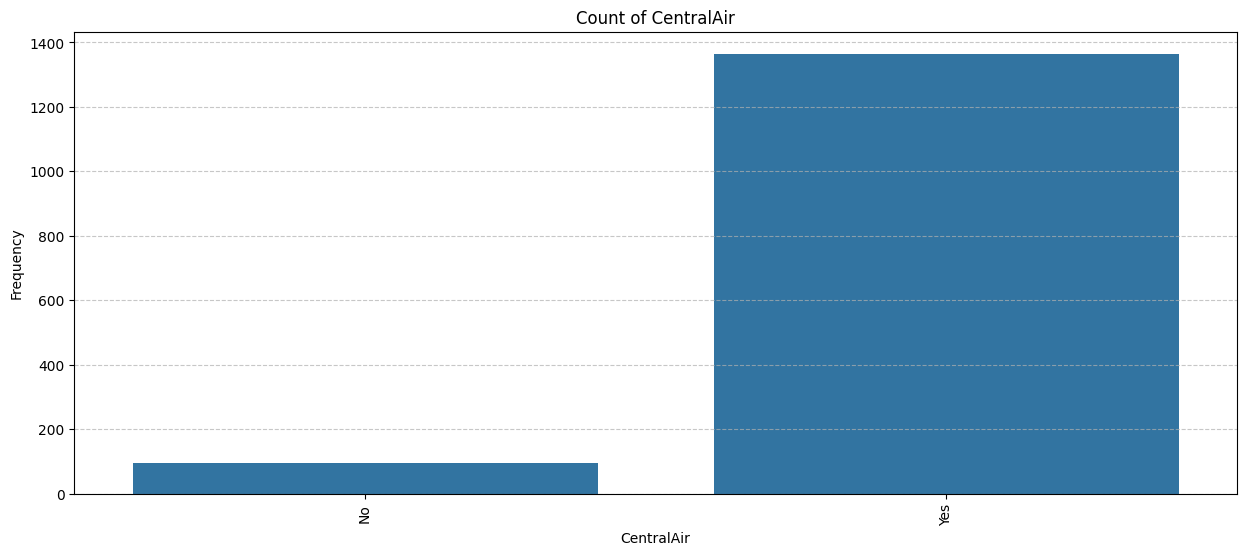

In [129]:
visualizer.plot('CentralAir')

### Insights:
- **Count and Missing Values:**
    - Count: 1,460 entries.
    - Missing Values: None (0.0%).
- **Distribution:**
    - Yes: 1,365 entries (93.5%).
    - No: 95 entries (6.5%).
- **Bar Plot:**
    - A significant majority of the properties have central air conditioning.
    - Only a small portion of the dataset lacks central air, indicating a strong preference or standard for central air conditioning in these properties.

## Electrical
### Checking for missing values

In [131]:
check_and_print_missing_value_counts(data, 'Electrical')

Missing values count: 1
Missing values percentage: 0.07%


### Descriptive Statistics

In [132]:
data['Electrical'].describe()

count                                  1459
unique                                    5
top       Standard Circuit Breakers & Romex
freq                                   1334
Name: Electrical, dtype: object

### Visualization

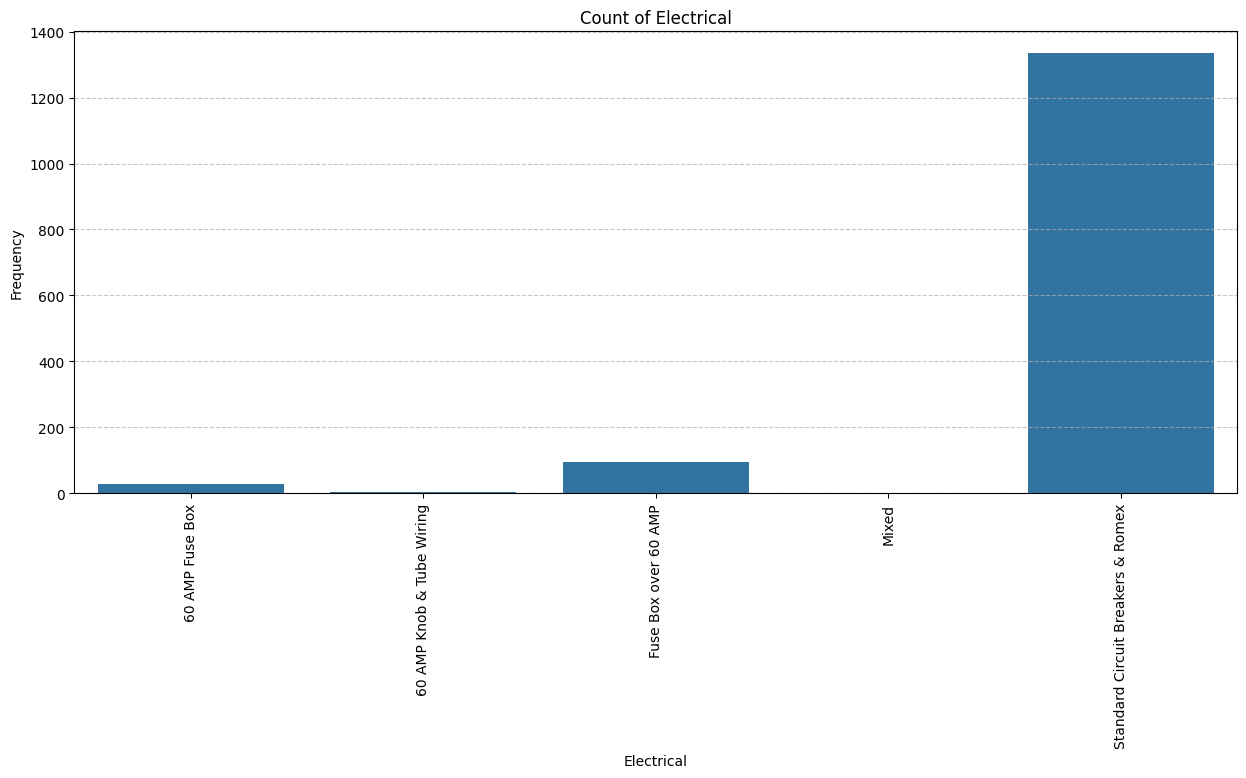

In [133]:
visualizer.plot('Electrical')

### Insights:
- **Count and Missing Values:**
    - Count: 1,459 entries.
    - Missing Values: 1 entry (0.07%).
- **Distribution:**
    - Standard Circuit Breakers & Romex: 1,334 entries (~91.5%), making it the dominant category.
    - Other Categories:
        - Fuse Box over 60 AMP: ~7.5%.
        - Remaining categories (e.g., 60 AMP Fuse Box, 60 AMP Knob & Tube Wiring, Mixed) are rare.
- **Bar Plot:**
    - The overwhelming dominance of Standard Circuit Breakers & Romex suggests it is the modern standard.
    - Very few properties have outdated or less common electrical systems.

## 1stFlrSF
### Checking for missing values

In [137]:
check_and_print_missing_value_counts(data, '1stFlrSF')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [138]:
data['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

### Visualization

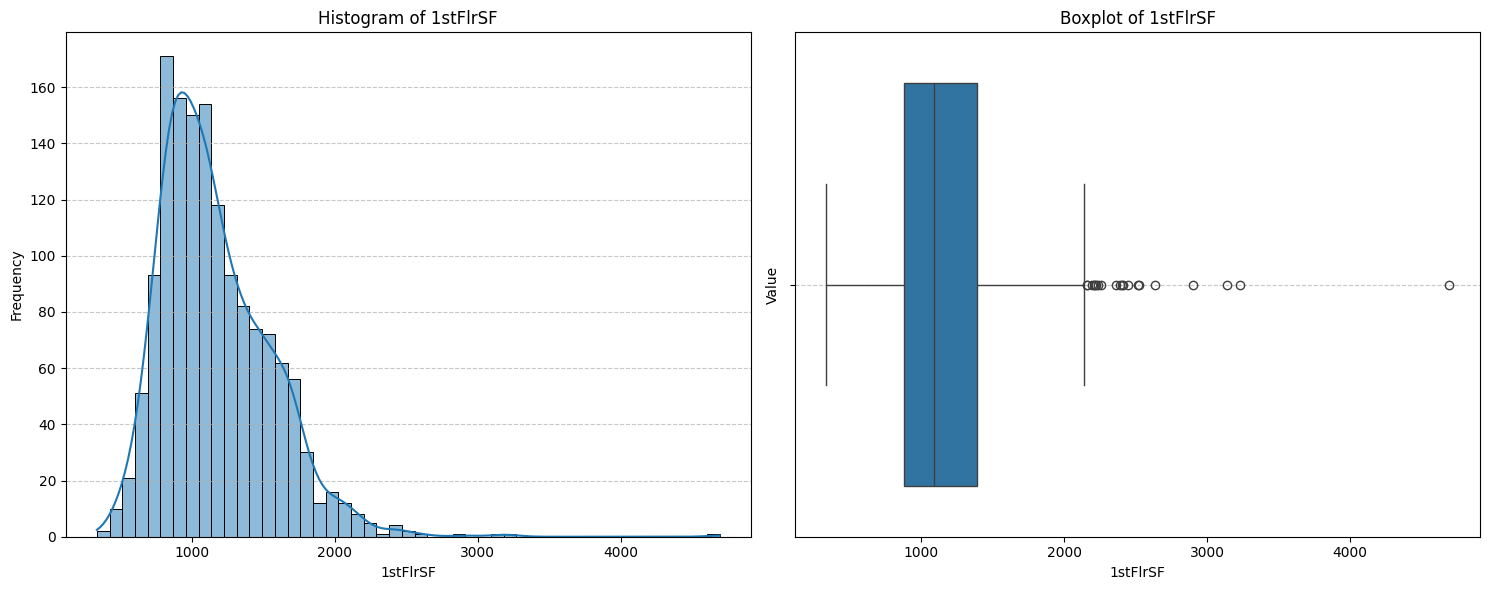

In [139]:
visualizer.plot('1stFlrSF')

### Insights:
- **Summary Statistics:**
    - Count: 1,460 (no missing values).
    - Mean: 1,162.23 square feet.
    - Standard Deviation: 386.59 square feet.
    - Min: 334 square feet.
    - Max: 4,692 square feet.
    - Quartiles:
        - 25% (Q1): 882 sq ft.
        - 50% (Median): 1,087 sq ft.
        - 75% (Q3): 1,391 sq ft.
- **Outliers:** The maximum value of 4,692 sq ft is significantly higher than Q3, indicating potential outliers.
- **Histogram:**
    - Most properties have a first-floor square footage clustered between 800 and 1,500 sq ft.
    - A right-skewed distribution with a long tail toward higher values.
- **Boxplot:** The presence of outliers is evident, particularly above 2,500 sq ft.

## 2ndFlrSF
### Checking for missing values

In [140]:
check_and_print_missing_value_counts(data, '2ndFlrSF')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [141]:
data['2ndFlrSF'].describe()

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64

### Visualization

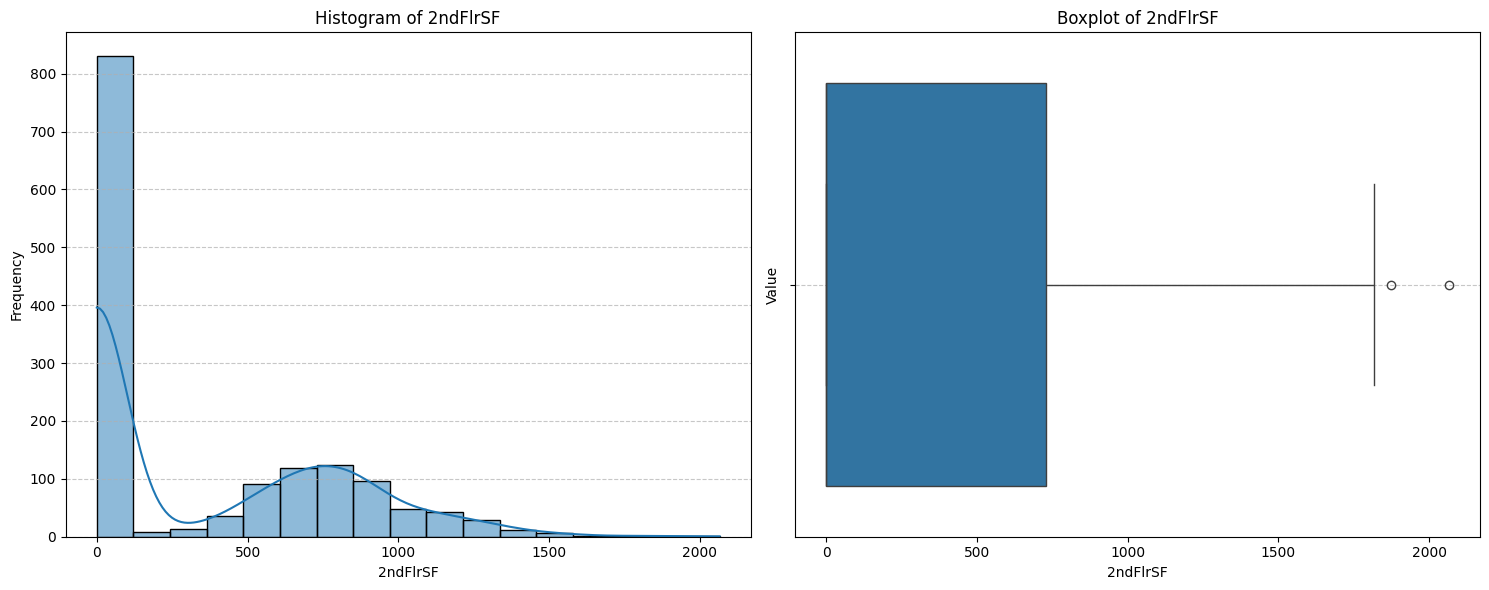

In [142]:
visualizer.plot('2ndFlrSF')

### Insights:
- **Summary Statistics:**
    - Count: 1,460 (no missing values).
    - Mean: 346.99 square feet.
    - Standard Deviation: 436.53 square feet.
    - Min: 0 square feet (indicating single-story properties).
    - Max: 2,065 square feet.
    - Quartiles:
        - 25% (Q1): 0 sq ft (many properties lack a second floor).
        - 50% (Median): 0 sq ft.
        - 75% (Q3): 728 sq ft.
- A significant proportion of properties (more than 50%) do not have a second floor, as indicated by the median and Q1 being 0.
- **Histogram:**
    - The distribution is heavily right-skewed due to a large number of properties without a second floor.
    - Among properties with a second floor, most have a second-floor area between 0 and 1,000 sq ft.
- **Boxplot:** A few outliers exist, with the largest second-floor area reaching 2,065 sq ft.

## LowQualFinSF
### Checking for missing values

In [147]:
check_and_print_missing_value_counts(data, 'LowQualFinSF')

Missing values count: 0
Missing values percentage: 0.0%


### Descriptive Statistics

In [148]:
data['LowQualFinSF'].describe()

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       572.000000
Name: LowQualFinSF, dtype: float64

### Visualization

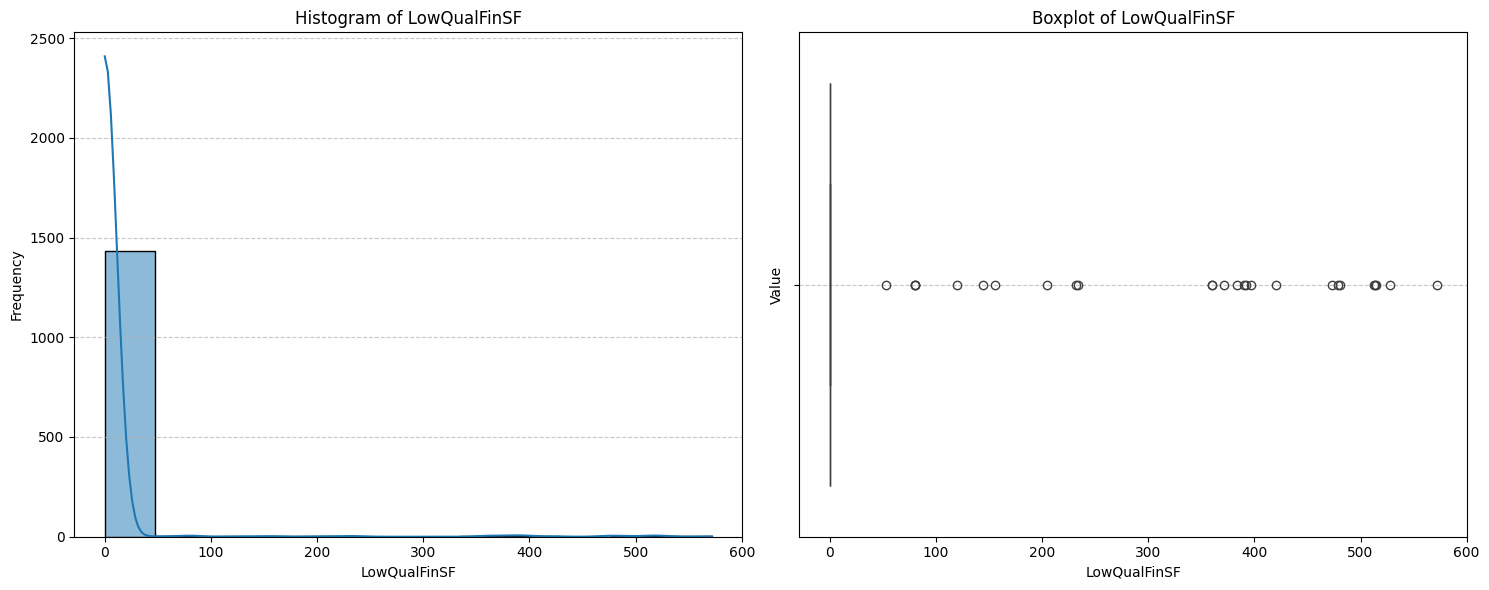

In [149]:
visualizer.plot('LowQualFinSF')

### Insights:
- **Summary Statistics:**
    - Count: 1,460 (no missing values).
    - Mean: 5.84 sq ft (very low average, indicating most properties don't have such areas).
    - Standard Deviation: 48.62 sq ft.
    - Min: 0 sq ft (majority of properties have no low-quality finished area).
    - Max: 572 sq ft.
    - Quartiles:
        - 25% (Q1): 0 sq ft.
        - 50% (Median): 0 sq ft.
        - 75% (Q3): 0 sq ft.
- The majority of properties do not have any low-quality finished square footage.
- A small fraction of properties has non-zero low-quality finished areas, as evident from the maximum value of 572 sq ft.
- **Histogram:**
    - The distribution is heavily right-skewed, with a large peak at 0 sq ft.
    - Only a few properties have non-zero values, and these values appear to be relatively small.
- **Boxplot:** A few outliers can be observed, representing properties with significant low-quality finished areas.

In [150]:
len(['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'])

35